In [1]:
import numpy as np
import pandas as pd
import copy
import importlib
import time
import sys
import random
import pickle
import tqdm
import networkx as nx
import multiprocessing as mp
from functools import partial, reduce
from prograph.utils import Dataset
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
#import tensorflow as tf

import prograph as pg
from prograph.distance import minkowski, hamming


from colorama import Fore
from colorama import Style

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


/home/acm/anaconda3/envs/prograph/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

darkmode = {"lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"}

lightmode = {"lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"}

mpl.rcParams.update(lightmode)

p = plt.rcParams

# former facecolor = #f9f9f9

p["figure.facecolor"] = "#ffffff"

p["axes.linewidth"] = 1
p["axes.facecolor"] = "#f9f9f9"
p["axes.ymargin"] = 0.1
p["axes.spines.bottom"] = True
p["axes.spines.left"] = True
p["axes.spines.right"] = False
p["axes.spines.top"] = False
p["font.sans-serif"] = ["Fira Sans Condensed"]

p["axes.grid"] = False
p["grid.color"] = "black"
p["grid.linewidth"] = 0.1

p["xtick.bottom"] = True
p["xtick.top"] = False
p["xtick.direction"] = "out"
p["xtick.major.size"] = 5
p["xtick.major.width"] = 1
p["xtick.minor.size"] = 3
p["xtick.minor.width"] = 0.5
p["xtick.minor.visible"] = True
p["xtick.labelsize"] = 24

p["ytick.left"] = True
p["ytick.right"] = False
p["ytick.direction"] = "out"
p["ytick.major.size"] = 5
p["ytick.major.width"] = 1
p["ytick.minor.size"] = 3
p["ytick.minor.width"] = 0.5
p["ytick.minor.visible"] = True
p["ytick.labelsize"] = 24

p["lines.linewidth"] = 2
p["lines.marker"] = None
p["lines.markeredgewidth"] = 1.5
p["lines.markeredgecolor"] = "auto"
p["lines.markerfacecolor"] = "white"
p["lines.markersize"] = 6


In [4]:
pgraph = pg.Prograph(file="data/datasets/gb1/G_Protein_Clean_Sequences_pgraph.pkl")


            Prograph
            Number of Sequences : 535917
            Max Distance        : 4
            Longest Sequence    : 56
            Number of Distances : 5
            Seed Sequence       : MAAKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE
                Modified positions are shown in green


In [16]:
pgraph[pgraph.indexing(positions=[2,3], Bool="or", distances=[2])]

pgraph.sklearn_data(idxs = pgraph.indexing(positions=[2,3], Bool="or", distances=[2]))
pgraph.pytorch_dataloaders(idxs = pgraph.indexing(positions=[2,3], Bool="or", distances=[2]))

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fc1dc8ee940>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fc22986bd00>}

In [17]:
pgraph = pg.Prograph(file="data/synthetic_data.csv")


100%|███████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 1573.49it/s]


            Prograph
            Number of Sequences : 1000
            Max Distance        : 3
            Longest Sequence    : 3
            Number of Distances : 4
            Seed Sequence       : AAA
                Modified positions are shown in green


In [3]:
import prograph as pg
importlib.reload(sys.modules['prograph.prograph'])
import prograph as pg


In [19]:
pgraph.fit(RandomForestRegressor, {'n_jobs' : 24})

Training model RandomForestRegressor(n_jobs=24)
Model score on training data: 0.9833011520022272
Score of RandomForestRegressor(n_jobs=24) on testing data is 0.8816655176088993


(0.9833011520022272, 0.8816655176088993)

In [12]:
from itertools import permutations, product

#list(product("ABCDEGHIJK",repeat=5))

for seq_len in range(1,9):
    seqs = ["".join(chars) for chars in list(permutations("ACDEFGHIJ", seq_len))]
    fitness = np.random.randn(len(seqs))

    df = pd.DataFrame(list(zip(seqs, fitness)), columns=["Sequence","Fitness"])
    df.to_csv(f"data/datasets/Timing_Datasets/dset_{seq_len}.csv")

In [51]:
df = pd.read_csv(f"data/datasets/Timing_Datasets/dset_{seq_len}.csv")

In [2]:
from datetime import datetime

cpu_times, gpu_times = [], []

for seq_len in range(1,8):
    start = datetime.now()
    pgragh = pg.Prograph(f"data/datasets/Timing_Datasets/dset_{seq_len}.csv", cpu=False)
    end = datetime.now()
    gpu_times.append(end-start)

for seq_len in range(1,8):
    start = datetime.now()
    pgragh = pg.Prograph(f"data/datasets/Timing_Datasets/dset_{seq_len}.csv", cpu=True)
    end = datetime.now()
    cpu_times.append(end-start)
    
    

/home/acm/PhD/prograph/prograph/prograph.py:823: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755853042/work/torch/csrc/utils/tensor_new.cpp:210.)
  gpu_tokenized = torch.as_tensor(
100%|████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 155.63it/s]



            Prograph
            Number of Sequences : 9
            Max Distance        : 1
            Longest Sequence    : 1
            Number of Distances : 2
            Seed Sequence       : A
                Modified positions are shown in green


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 3823.43it/s]



            Prograph
            Number of Sequences : 72
            Max Distance        : 2
            Longest Sequence    : 2
            Number of Distances : 3
            Seed Sequence       : AC
                Modified positions are shown in green


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 3890.71it/s]



            Prograph
            Number of Sequences : 504
            Max Distance        : 3
            Longest Sequence    : 3
            Number of Distances : 4
            Seed Sequence       : ACD
                Modified positions are shown in green


100%|███████████████████████████████████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 4744.40it/s]



            Prograph
            Number of Sequences : 3024
            Max Distance        : 4
            Longest Sequence    : 4
            Number of Distances : 5
            Seed Sequence       : ACDE
                Modified positions are shown in green


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1890/1890 [00:00<00:00, 5037.43it/s]



            Prograph
            Number of Sequences : 15120
            Max Distance        : 5
            Longest Sequence    : 5
            Number of Distances : 6
            Seed Sequence       : ACDEF
                Modified positions are shown in green


100%|█████████████████████████████████████████████████████████████████████████████████████████| 7560/7560 [00:02<00:00, 3484.46it/s]



            Prograph
            Number of Sequences : 60480
            Max Distance        : 6
            Longest Sequence    : 6
            Number of Distances : 7
            Seed Sequence       : ACDEFG
                Modified positions are shown in green


100%|███████████████████████████████████████████████████████████████████████████████████████| 22680/22680 [00:15<00:00, 1504.98it/s]



            Prograph
            Number of Sequences : 181440
            Max Distance        : 7
            Longest Sequence    : 7
            Number of Distances : 8
            Seed Sequence       : ACDEFGH
                Modified positions are shown in green


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 5074.78it/s]



            Prograph
            Number of Sequences : 9
            Max Distance        : 1
            Longest Sequence    : 1
            Number of Distances : 2
            Seed Sequence       : A
                Modified positions are shown in green


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 11312.18it/s]



            Prograph
            Number of Sequences : 72
            Max Distance        : 2
            Longest Sequence    : 2
            Number of Distances : 3
            Seed Sequence       : AC
                Modified positions are shown in green


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 8208.29it/s]



            Prograph
            Number of Sequences : 504
            Max Distance        : 3
            Longest Sequence    : 3
            Number of Distances : 4
            Seed Sequence       : ACD
                Modified positions are shown in green


100%|███████████████████████████████████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 3002.39it/s]


            Prograph
            Number of Sequences : 3024
            Max Distance        : 4
            Longest Sequence    : 4
            Number of Distances : 5
            Seed Sequence       : ACDE
                Modified positions are shown in green



100%|█████████████████████████████████████████████████████████████████████████████████████████| 1890/1890 [00:00<00:00, 2180.69it/s]



            Prograph
            Number of Sequences : 15120
            Max Distance        : 5
            Longest Sequence    : 5
            Number of Distances : 6
            Seed Sequence       : ACDEF
                Modified positions are shown in green


100%|██████████████████████████████████████████████████████████████████████████████████████████| 7560/7560 [00:13<00:00, 580.61it/s]



            Prograph
            Number of Sequences : 60480
            Max Distance        : 6
            Longest Sequence    : 6
            Number of Distances : 7
            Seed Sequence       : ACDEFG
                Modified positions are shown in green


100%|█████████████████████████████████████████████████████████████████████████████████████████| 22680/22680 [04:51<00:00, 77.89it/s]



            Prograph
            Number of Sequences : 181440
            Max Distance        : 7
            Longest Sequence    : 7
            Number of Distances : 8
            Seed Sequence       : ACDEFGH
                Modified positions are shown in green


In [41]:
np.log([x.total_seconds() for x in cpu_times[1:]])

TypeError: log() got an unexpected keyword argument 'base'

In [12]:

def save_obj(obj, name):
    assert isinstance(name, str), "Name must be a string"
    ext = name.split(".")[-1]
    if ext != "pkl":
        ext = ".pkl"
    with open(name + ext, "wb") as f:
        pickle.dump(obj, f)
    print("File Saved Successfully")
    return None

#save_obj(timing_results, "timing_results")

In [13]:

def load_obj(name):
    assert isinstance(name, str), "Name must be a string"
    ext = name.split(".")[-1]
    if ext == "pkl":
        ext = ""
    else:
        ext = ".pkl"
    with open(name + ext, "rb") as f:
        obj = pickle.load(f)
    print("File Loaded Successfully")
    return obj

#load_obj("timing_results.pkl")['gpu'] == timing_results['gpu']

In [158]:
timing_results = {"cpu" : cpu_times,
                  "gpu" : gpu_times}

In [31]:
no_sequences = [72, 504, 3024, 15120, 60480, 181440]

/tmp/ipykernel_23153/2544079936.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"$10^{{{s}}}$" for s in [-3,-2,-1,0,1,2,3]], fontsize=24)


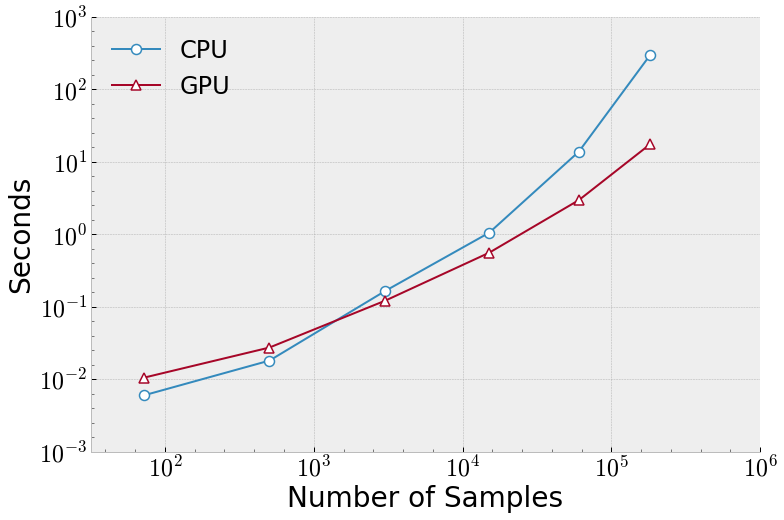

In [94]:
# Stylesheets defined in Matplotlib
plt.style.use('bmh')

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.plot(np.log10(no_sequences), np.log10([x.total_seconds() for x in cpu_times[1:]]), marker="o", label="CPU", markersize=10)
ax.plot(np.log10(no_sequences), np.log10([x.total_seconds() for x in gpu_times[1:]]), marker="^", label="GPU", markersize=10)

ax.set_ylim(-3,3)
ax.set_xlim(1.5,6)

ax.get_xticks()
ax.set_xticks([2,3,4,5,6])
ax.set_xticklabels([f"$10^{x}$" for x in [2,3,4,5,6]], fontsize=24)
ax.set_yticklabels([f"$10^{{{s}}}$" for s in [-3,-2,-1,0,1,2,3]], fontsize=24)
ax.set_ylabel("Seconds", fontsize=28)
ax.set_xlabel("Number of Samples", fontsize=28)

ax.legend(frameon=False, fontsize=24)

plt.savefig("GPU Timing Plot.svg", bbox_inches="tight")
plt.savefig("GPU Timing Plot.pdf", bbox_inches="tight")

In [30]:
loaders = pgraph.pytorch_dataloaders(positions=[1], distance=1)
train_dl, test_dl = loaders['train'], loaders['test']


In [97]:
import prograph as pg
importlib.reload(sys.modules['prograph.prograph'])
import prograph as pg

pgraph = pg.Prograph(file="data/datasets/avGFP/avGFP_stardropped_pgraph.pkl")


            Prograph
            Number of Sequences : 51722
            Max Distance        : 16
            Longest Sequence    : 161
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green


In [98]:
datasets = [pg.Prograph(file="data/datasets/avGFP/avGFP_stardropped_pgraph.pkl"),
            pg.Prograph(file="data/datasets/gb1/G_Protein_Clean_Sequences_pgraph.pkl"),
            pg.Prograph(file="data/datasets/pab1/pab1_double_mut_processed_stardropped_pgraph.pkl"),
            pg.Prograph(file="data/datasets/ube4b/ube4b_clean_pgraph.pkl")]


            Prograph
            Number of Sequences : 51722
            Max Distance        : 16
            Longest Sequence    : 161
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green

            Prograph
            Number of Sequences : 535917
            Max Distance        : 4
            Longest Sequence    : 56
            Number of Distances : 5
            Seed Sequence       : MAAKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE
                Modified positions are shown in green

            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAA

In [39]:
import prograph as pg
importlib.reload(sys.modules['prograph.prograph'])
import prograph as pg

pab1 = pg.Prograph(file="data/datasets/pab1/pab1_double_mut_processed_stardropped_pgraph.pkl")


            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


In [103]:
i = 0

knn1 = datasets[i].build_graph(k=10,representation="esm_43M_embedded",distance=minkowski,similarity=True)
knn2 = datasets[i].build_graph(k=10,representation="esm_85M_embedded",distance=minkowski,similarity=True)
knn3 = datasets[i].build_graph(k=10,representation="esm_670M_embedded",distance=minkowski,similarity=True)

datasets[i].graph["43M_KNN"]  = knn1
datasets[i].graph["85M_KNN"]  = knn2
datasets[i].graph["670M_KNN"] = knn3

print(datasets[i].dirichlet(graph="43M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[i].dirichlet(graph="85M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[i].dirichlet(graph="670M_KNN",boolean_weights=True,scaler=None,mode="indegree"))

KeyError: 'esm_43M_embedded'

# Notes

The poor performance of random forest (at least in terms of correlation between model performance and Dirichlet) may be due to its inability to leverage the information in the geometric representation properly as it has to find decision boundaries.

In [26]:
from sklearn.neural_network import MLPRegressor
i = 0
print(datasets[i].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T6_embedded"))
print(datasets[i].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T12_embedded"))
print(datasets[i].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T34_embedded"))

Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.6468296474884067
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.6267423983676024
Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.5029872956746515
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.4878062555704197
Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.4579877234761853
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.4505477881740385


(0.4579877234761853, 0.4505477881740385)

In [11]:
datasets[3].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T12_embedded")

Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.16931108600521705
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.1226715721371161


(0.16931108600521705, 0.1226715721371161)

In [13]:
datasets[3].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T34_embedded")

Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.14771477752544937
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.11550052679864342


(0.14771477752544937, 0.11550052679864342)

In [15]:
datasets[2].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T6_embedded")

Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.7241228457091031
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.7238248265541527


(0.7241228457091031, 0.7238248265541527)

In [16]:
datasets[2].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T12_embedded")

Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.6964315800919263
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.6878188623619557


(0.6964315800919263, 0.6878188623619557)

In [17]:
datasets[2].fit(MLPRegressor,{"random_state":1,"early_stopping":True,"max_iter":1000},representation="T34_embedded")

Training model MLPRegressor(early_stopping=True, max_iter=1000, random_state=1)
Model score on training data: 0.8228601091272751
Score of MLPRegressor(early_stopping=True, max_iter=1000, random_state=1) on testing data is 0.8116342999253954


(0.8228601091272751, 0.8116342999253954)

In [14]:
datasets[3].fit(RandomForestRegressor,{"random_state":1,"n_jobs" : 32},representation="T6_embedded")

Training model RandomForestRegressor(n_jobs=32, random_state=1)


KeyboardInterrupt: 

In [ ]:
datasets[3].fit(RandomForestRegressor,{"random_state":1,"n_jobs" : 32},representation="T12_embedded")

In [ ]:
datasets[3].fit(RandomForestRegressor,{"random_state":1,"n_jobs" : 32},representation="T34_embedded")

In [7]:
datasets[0].fit(RandomForestRegressor,{"n_jobs" : 32},representation="T6_embedded")

Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9207282726340692
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.4410946302823445


(0.9207282726340692, 0.4410946302823445)

In [14]:
datasets[0].fit(RandomForestRegressor,{"n_jobs" : 32},representation="T12_embedded")

Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.920680906717592
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.444753214555099


(0.920680906717592, 0.444753214555099)

In [15]:
datasets[0].fit(RandomForestRegressor,{"n_jobs" : 32},representation="T34_embedded")

Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9194771723137565
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.431894445910475


(0.9194771723137565, 0.431894445910475)

In [6]:
pab1.fit(RandomForestRegressor,{"n_jobs" : 32},representation="esm_85M_embedded")

Training model RandomForestRegressor(n_jobs=32)


/home/adam/PhD/prograph/prograph/prograph.py:1153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Model score on training data: 0.9469102452905601
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.6205390371912303


(0.9469102452905601, 0.6205390371912303)

In [7]:
pab1.fit(RandomForestRegressor,{"n_jobs" : 32},representation="esm_670M_embedded")

Training model RandomForestRegressor(n_jobs=32)


/home/adam/PhD/prograph/prograph/prograph.py:1153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Model score on training data: 0.9483442171573627
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.6367008282828617


(0.9483442171573627, 0.6367008282828617)

In [5]:
pab1.fit(RandomForestRegressor,{"n_jobs" : 32},representation="Tokenized")

Training model RandomForestRegressor(n_jobs=32)


/home/adam/PhD/prograph/prograph/prograph.py:1153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Model score on training data: 0.9636077844333619
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.7249905190825228


(0.9636077844333619, 0.7249905190825228)

In [6]:
pab1.fit(RandomForestRegressor,{"n_jobs" : 32},representation="Random")

(29217,) (7305,)
Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.8576760885740863
Score of RandomForestRegressor(n_jobs=32) on testing data is -0.009813905528041955


(0.8576760885740863, -0.009813905528041955)

In [4]:
random = [np.random.randn(100,) for x in range(len(pab1))]

In [5]:
pab1.graph["Random"] = random

In [16]:
pg.Prograph()

TypeError: __init__() missing 1 required positional argument: 'file'

In [65]:
hold2 = pab1.build_graph(representation="Tokenized",k=10,distance=minkowski,similarity=True)

100%|██████████| 4566/4566 [00:05<00:00, 785.78it/s]


In [66]:
pab1.graph["Tokenized_KNN"] = hold2

In [7]:
pab1("43M_KNN")

Unnamed: 0
0        ([11, 20, 16, 1, 12134, 5352, 11081, 11074, 12...
1        ([6, 27, 14, 10, 13, 11, 0, 20, 2, 11086], [0....
2        ([10, 26, 27856, 7069, 27863, 8412, 35638, 278...
3        ([25, 35502, 21, 11078, 35674, 19626, 5347, 27...
4        ([19, 26, 8614, 8439, 7083, 16212, 35702, 8616...
                               ...                        
39603    ([36481, 36427, 34477, 29365, 34432, 22586, 36...
39604    ([36494, 36324, 27815, 34549, 36519, 34389, 20...
39605    ([35732, 36494, 27815, 8858, 36518, 30615, 323...
39606    ([36396, 35478, 36508, 20812, 31477, 10094, 11...
39607    ([36501, 36223, 36483, 35672, 36454, 36470, 36...
Name: 43M_KNN, Length: 36522, dtype: object

In [67]:
var1 = pab1.local_variance(graph="43M_KNN")
var2 = pab1.local_variance(graph="85M_KNN")
var3 = pab1.local_variance(graph="670M_KNN")
var4 = pab1.local_variance(graph="Random_KNN")
var5 = pab1.local_variance(graph="Tokenized_KNN")

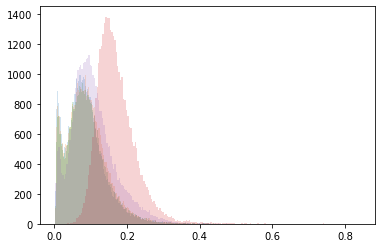

In [71]:
plt.hist(var1,bins=200,alpha=0.2)
plt.hist(var2,bins=200,alpha=0.2)
plt.hist(var3,bins=200,alpha=0.2)
plt.hist(var4,bins=200,alpha=0.2)
plt.hist(var5,bins=200,alpha=0.2)
plt.show()

In [20]:
# I Need to know if during unsupervised training the dirichlet energy of the embedded graphs decreases
# It is significantly lower than both a naive hamming embedding

36522

In [20]:
from prograph.distance import minkowski
knn1 = datasets[3].build_graph(k=3,representation="T6_embedded",distance=minkowski,similarity=True)
knn2 = datasets[3].build_graph(k=3,representation="T12_embedded",distance=minkowski,similarity=True)
knn3 = datasets[3].build_graph(k=3,representation="T34_embedded",distance=minkowski,similarity=True)

100%|██████████| 11379/11379 [03:46<00:00, 50.30it/s]


In [21]:
datasets[3].graph["43M_KNN"]  = knn1
datasets[3].graph["85M_KNN"]  = knn2
datasets[3].graph["670M_KNN"] = knn3

In [13]:
from prograph.distance import minkowski
knn1 = pab1.build_graph(k=10,representation="esm_43M_embedded",distance=minkowski,similarity=True)
knn2 = pab1.build_graph(k=10,representation="esm_85M_embedded",distance=minkowski,similarity=True)
knn3 = pab1.build_graph(k=10,representation="esm_670M_embedded",distance=minkowski,similarity=True)

pab1.graph["43M_KNN"]  = knn1
pab1.graph["85M_KNN"]  = knn2
pab1.graph["670M_KNN"] = knn3

print(datasets[3].dirichlet(graph="43M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[3].dirichlet(graph="85M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[3].dirichlet(graph="670M_KNN",boolean_weights=True,scaler=None,mode="indegree"))

100%|██████████| 4566/4566 [00:36<00:00, 124.45it/s]


In [22]:
pab1.graph["43M_KNN"]  = knn1
pab1.graph["85M_KNN"]  = knn2
pab1.graph["670M_KNN"] = knn3

print(datasets[3].dirichlet(graph="43M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[3].dirichlet(graph="85M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[3].dirichlet(graph="670M_KNN",boolean_weights=True,scaler=None,mode="indegree"))

In [23]:
print(datasets[3].dirichlet(graph="43M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[3].dirichlet(graph="85M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[3].dirichlet(graph="670M_KNN",boolean_weights=True,scaler=None,mode="indegree"))

[[2810971.95491527]]
[[3142434.65954332]]
[[3666765.11333577]]


In [28]:
i = 2
knn1 = datasets[i].build_graph(k=10,representation="T6_embedded",distance=minkowski,similarity=True)
knn2 = datasets[i].build_graph(k=10,representation="T12_embedded",distance=minkowski,similarity=True)
knn3 = datasets[i].build_graph(k=10,representation="T34_embedded",distance=minkowski,similarity=True)

datasets[i].graph["43M_KNN"]  = knn1
datasets[i].graph["85M_KNN"]  = knn2
datasets[i].graph["670M_KNN"] = knn3

print(datasets[i].dirichlet(graph="43M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[i].dirichlet(graph="85M_KNN",boolean_weights=True,scaler=None,mode="indegree"))
print(datasets[i].dirichlet(graph="670M_KNN",boolean_weights=True,scaler=None,mode="indegree"))

100%|██████████| 4566/4566 [00:36<00:00, 123.83it/s]


[[24059.98429746]]
[[22695.08977706]]
[[20778.35511758]]


In [63]:
pab1.dirichlet(graph="Random_KNN",boolean_weights=True,scaler=None,mode="indegree")

array([[57727.98866549]])

In [69]:
pab1.dirichlet(graph="Tokenized_KNN",boolean_weights=True,scaler=None,mode="indegree")

array([[34773.08421684]])

In [47]:
Y = pab1.graph["Fitness"].to_numpy()

X = np.concatenate([x.reshape(1,-1) for x in pab1.graph["esm_43M_embedded"].to_numpy()],axis=0)

In [92]:
np.vstack(pab1("Tokenized"))

array([[ 6, 12,  8, ..., 18,  1, 13],
       [ 6, 12,  8, ..., 18,  1, 13],
       [ 6, 12,  8, ..., 18,  1, 13],
       ...,
       [ 6, 12,  8, ..., 18,  1, 13],
       [ 6, 12,  8, ..., 18,  1, 13],
       [ 6, 12,  8, ..., 18,  1, 13]])

In [77]:
pab1.sklearn_data()

ValueError: setting an array element with a sequence.

In [ ]:
model.score(X_test, Y_test)

In [15]:
knn1 = pab1.build_graph(k=3,representation="esm_43M_embedded",distance=minkowski,similarity=False)
pab1.graph["43M_eps"]  = knn1



100%|██████████| 4566/4566 [00:23<00:00, 196.30it/s]


In [4]:
L,P = zip(*pab1("43M_ps"))

In [ ]:
pab1("43M_eps")

In [33]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

check_symmetric(A)

False

In [7]:
pab1.adjacency(graph="43M_eps").todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
A = pab1.laplacian(graph="43M_eps").todense()

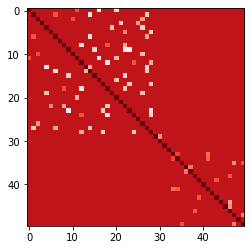

In [17]:
plt.imshow(A[:50,:50],cmap="Reds",vmax=0.5)

In [27]:
np.sum(A,axis=0)

matrix([[ 2.4299316,  1.3361816,  1.7641602, ...,  1.671875 ,  1.7385254,
         -2.7407227]], dtype=float32)

In [33]:
x = np.array([[2,-1,-1],[-1,1,0],[-1,0,1]])
np.sum(x,axis=1)

array([0, 0, 0])

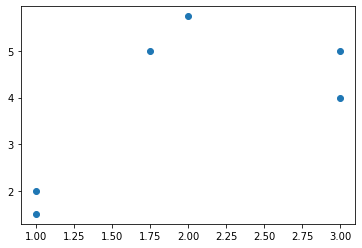

In [2]:
knn_data = np.array([[1,1.5],
                     [1,2],
                     [3,5],
                     [3,4],
                     [1.75,5],
                     [2.,5.75]])

plt.scatter(*knn_data.T)

In [11]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

knn_test.laplacian(graph="Weighted",mode="indegree").todense()

[-0.500 -0.500 -3.500 -10.646 -10.313 -4.056]


matrix([[-0.500, -0.500, 0.000, -3.201, -3.580, 0.000],
        [-0.500, -0.500, 0.000, -2.828, -3.092, 0.000],
        [0.000, 0.000, -3.500, -1.000, -1.250, -1.250],
        [0.000, 0.000, -1.000, -10.646, -1.601, -2.016],
        [0.000, 0.000, -1.250, -1.601, -10.313, -0.791],
        [0.000, 0.000, -1.250, -2.016, -0.791, -4.056]], dtype=float32)

In [3]:
knn_test = pg.Prograph(file="data/knntest.csv")
knn_test.graph["Embedded"] = [x for x in knn_data]
#pg.utils.save(knn_test)

100%|██████████| 1/1 [00:00<00:00, 514.95it/s]


            Prograph
            Number of Sequences : 6
            Max Distance        : 1
            Longest Sequence    : 1
            Number of Distances : 2
            Seed Sequence       : A
                Modified positions are shown in green


In [9]:
knn_test.graph["Weighted"] = knn_test.build_graph(k=3,representation="Embedded",distance=minkowski)


100%|██████████| 1/1 [00:00<00:00, 1415.08it/s]


In [32]:
A = knn_test.adjacency("K3").todense()

In [35]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
A

matrix([[0.000, 0.500, 0.000, 3.201, 3.580, 0.000],
        [0.500, 0.000, 0.000, 2.828, 3.092, 0.000],
        [0.000, 0.000, 0.000, 1.000, 1.250, 1.250],
        [0.000, 0.000, 1.000, 0.000, 1.601, 2.016],
        [0.000, 0.000, 1.250, 1.601, 0.000, 0.791],
        [0.000, 0.000, 1.250, 2.016, 0.791, 0.000]], dtype=float32)

In [37]:
knn_test.graph

,Sequence,Fitness,Tokenized,Neighbours,Embedded,K3
0,A,1.704060,[1],"([1, 2, 3, 4, 5], [1, 1, 1, 1, 1])","[1.0, 1.5]","([1, 3, 4], [0.5, 3.201, 3.58])"
1,C,0.327881,[2],"([0, 2, 3, 4, 5], [1, 1, 1, 1, 1])","[1.0, 2.0]","([0, 3, 4], [0.5, 2.828, 3.092])"
2,D,0.795886,[3],"([0, 1, 3, 4, 5], [1, 1, 1, 1, 1])","[3.0, 5.0]","([3, 4, 5], [1.0, 1.25, 1.25])"
3,E,0.533364,[4],"([0, 1, 2, 4, 5], [1, 1, 1, 1, 1])","[3.0, 4.0]","([2, 4, 5], [1.0, 1.601, 2.016])"
4,F,-0.180892,[5],"([0, 1, 2, 3, 5], [1, 1, 1, 1, 1])","[1.75, 5.0]","([5, 2, 3], [0.7905, 1.25, 1.601])"
5,G,0.616605,[6],"([0, 1, 2, 3, 4], [1, 1, 1, 1, 1])","[2.0, 5.75]","([4, 2, 3], [0.7905, 1.25, 2.016])"


In [45]:
knn_test = pg.Prograph(file="data/knntest_pgraph.pkl")

knn_test.graph["Weighted"] = knn_test.build_graph(eps=2,representation="Embedded",distance=minkowski)
knn_test.graph

100%|██████████| 1/1 [00:00<00:00, 1598.44it/s]


            Prograph
            Number of Sequences : 6
            Max Distance        : 1
            Longest Sequence    : 1
            Number of Distances : 2
            Seed Sequence       : A
                Modified positions are shown in green


,Sequence,Fitness,Neighbours,Embedded,Tokenized,Weighted
0,A,1.704060,"([1, 2, 3, 4, 5], [1, 1, 1, 1, 1])","[1.0, 1.5]",[1],"([1], [0.5])"
1,C,0.327881,"([0, 2, 3, 4, 5], [1, 1, 1, 1, 1])","[1.0, 2.0]",[2],"([0], [0.5])"
2,D,0.795886,"([0, 1, 3, 4, 5], [1, 1, 1, 1, 1])","[3.0, 5.0]",[3],"([3, 4, 5], [1.0, 1.25, 1.25])"
3,E,0.533364,"([0, 1, 2, 4, 5], [1, 1, 1, 1, 1])","[3.0, 4.0]",[4],"([2, 4], [1.0, 1.601])"
4,F,-0.180892,"([0, 1, 2, 3, 5], [1, 1, 1, 1, 1])","[1.75, 5.0]",[5],"([2, 3, 5], [1.25, 1.601, 0.7905])"
5,G,0.616605,"([0, 1, 2, 3, 4], [1, 1, 1, 1, 1])","[2.0, 5.75]",[6],"([2, 4], [1.25, 0.7905])"


In [46]:
knn_test.graph["Weighted"] = knn_test.build_graph(eps=2,representation="Embedded",distance=minkowski,similarity=True)
knn_test.graph

100%|██████████| 1/1 [00:00<00:00, 1242.76it/s]


,Sequence,Fitness,Neighbours,Embedded,Tokenized,Weighted
0,A,1.704060,"([1, 2, 3, 4, 5], [1, 1, 1, 1, 1])","[1.0, 1.5]",[1],"([1], [0.6665])"
1,C,0.327881,"([0, 2, 3, 4, 5], [1, 1, 1, 1, 1])","[1.0, 2.0]",[2],"([0], [0.6665])"
2,D,0.795886,"([0, 1, 3, 4, 5], [1, 1, 1, 1, 1])","[3.0, 5.0]",[3],"([3, 4, 5], [0.5, 0.4443, 0.4443])"
3,E,0.533364,"([0, 1, 2, 4, 5], [1, 1, 1, 1, 1])","[3.0, 4.0]",[4],"([2, 4], [0.5, 0.3843])"
4,F,-0.180892,"([0, 1, 2, 3, 5], [1, 1, 1, 1, 1])","[1.75, 5.0]",[5],"([2, 3, 5], [0.4443, 0.3843, 0.558])"
5,G,0.616605,"([0, 1, 2, 3, 4], [1, 1, 1, 1, 1])","[2.0, 5.75]",[6],"([2, 4], [0.4443, 0.558])"


In [6]:
minkowski(knn_data,knn_data,similarity=False)

tensor([[0.0000, 0.5000, 4.0311, 3.2016, 3.5795, 4.3661],
        [0.5000, 0.0000, 3.6056, 2.8284, 3.0923, 3.8810],
        [4.0311, 3.6056, 0.0000, 1.0000, 1.2500, 1.2500],
        [3.2016, 2.8284, 1.0000, 0.0000, 1.6008, 2.0156],
        [3.5795, 3.0923, 1.2500, 1.6008, 0.0000, 0.7906],
        [4.3661, 3.8810, 1.2500, 2.0156, 0.7906, 0.0000]], dtype=torch.float64)

In [6]:
minkowski(knn_data,knn_data,similarity=True)

tensor([[1.0000, 0.6667, 0.1988, 0.2380, 0.2184, 0.1864],
        [0.6667, 1.0000, 0.2171, 0.2612, 0.2444, 0.2049],
        [0.1988, 0.2171, 1.0000, 0.5000, 0.4444, 0.4444],
        [0.2380, 0.2612, 0.5000, 1.0000, 0.3845, 0.3316],
        [0.2184, 0.2444, 0.4444, 0.3845, 1.0000, 0.5585],
        [0.1864, 0.2049, 0.4444, 0.3316, 0.5585, 1.0000]], dtype=torch.float64)

In [58]:
knn_test.graph["K3"] = knn_test.build_graph(k=3,representation="Embedded",distance=minkowski)

100%|██████████| 1/1 [00:00<00:00, 1648.70it/s]


In [59]:
knn_test.dirichlet(graph="K3")

array([[6.71841252]])

In [7]:
import operator
from prograph.distance import hamming,minkowski

L = knn_test.build_graph(representation="Embedded",eps=2,distance=minkowski,batch_size=4)
L

100%|██████████| 2/2 [00:00<00:00, 2764.87it/s]


[(array([1]), array([0.5], dtype=float16)),
 (array([0]), array([0.5], dtype=float16)),
 (array([3, 4, 5]), array([1.  , 1.25, 1.25], dtype=float16)),
 (array([2, 4]), array([1.   , 1.601], dtype=float16)),
 (array([2, 3, 5]), array([1.25  , 1.601 , 0.7905], dtype=float16)),
 (array([2, 4]), array([1.25  , 0.7905], dtype=float16))]

In [8]:
knn_test.get_neighbour_coords(graph="Weighted")

(array([0, 1, 2, 3, 4, 5]),
 array([1, 0, 3, 2, 5, 4]),
 array([0.5       , 0.5       , 1.        , 1.        , 0.79052734,
        0.79052734], dtype=float32))

In [9]:
knn_test.graph["K2"] = L

In [10]:
A = knn_test.adjacency(graph="Weighted")
A.todense()

matrix([[0.        , 0.5       , 0.        , 0.        , 0.        ,
         0.        ],
        [0.5       , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.79052734],
        [0.        , 0.        , 0.        , 0.        , 0.79052734,
         0.        ]], dtype=float32)

In [11]:
A = knn_test.adjacency(graph="K2",boolean_weights=True)
A.todense()

matrix([[0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 1., 0., 1., 0.],
        [0., 0., 1., 1., 0., 1.],
        [0., 0., 1., 0., 1., 0.]])

In [16]:
A = knn_test.laplacian(graph="K2",boolean_weights=False)
A.todense()


matrix([[ 0.5       , -0.5       ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.5       ,  0.5       ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  3.5       , -1.        , -1.25      ,
         -1.25      ],
        [ 0.        ,  0.        , -1.        ,  2.600586  , -1.6005859 ,
          0.        ],
        [ 0.        ,  0.        , -1.25      , -1.6005859 ,  3.6411133 ,
         -0.79052734],
        [ 0.        ,  0.        , -1.25      ,  0.        , -0.79052734,
          2.0405273 ]], dtype=float32)

In [172]:
torch.as_tensor(knn_test("Embedded"))

tensor([[1.0000, 1.5000],
        [1.0000, 2.0000],
        [3.0000, 5.0000],
        [3.0000, 4.0000],
        [1.7500, 5.0000],
        [2.0000, 5.7500]], dtype=torch.float64)

In [133]:
from scipy.spatial.distance import cdist

cdist(knn_data,knn_data)

array([[0.        , 0.5       , 4.03112887, 3.20156212, 3.57945527,
        4.3660623 ],
       [0.5       , 0.        , 3.60555128, 2.82842712, 3.09232922,
        3.88104367],
       [4.03112887, 3.60555128, 0.        , 1.        , 1.25      ,
        1.25      ],
       [3.20156212, 2.82842712, 1.        , 0.        , 1.60078106,
        2.01556444],
       [3.57945527, 3.09232922, 1.25      , 1.60078106, 0.        ,
        0.79056942],
       [4.3660623 , 3.88104367, 1.25      , 2.01556444, 0.79056942,
        0.        ]])

In [3]:
pab1 = pg.Prograph("data/datasets/pab1/pab1_double_mut_processed_stardropped.csv",index_col=None)

100%|██████████| 4566/4566 [00:05<00:00, 901.93it/s]



            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


In [3]:
pab1.dirichlet()

array([[2897.51295548]])

In [5]:
s1 = pab1.graph.iloc[36521]["Sequence"]
s2 = pab1.graph.iloc[35494]["Sequence"]

sum([c1 != c2 for c1, c2 in zip (s1,s2)])

1

In [4]:
X = torch.Tensor(land0.graph.iloc[100000]["Tokenized"])
Y = torch.Tensor(land0("Tokenized"))
from prograph.distance import hamming 



NameError: name 'land0' is not defined

In [30]:
torch.where(hamming(X,Y) <= 1)

(tensor([ 40950,  99991,  99992,  99993,  99994,  99995,  99996,  99997,  99998,
          99999, 100000]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [6]:
V = pab1("Fitness").to_numpy()

S = pab1.adjacency()
G = nx.from_scipy_sparse_matrix(S)
L = nx.laplacian_matrix(G)

In [7]:
L1 = pab1.laplacian()

In [8]:
np.where(L.todense() != L1.todense())

(array([], dtype=int64), array([], dtype=int64))

In [11]:
type(L)

scipy.sparse.csr.csr_matrix

In [2]:
test = pg.Prograph("data/synthetic_data.csv")

100%|██████████| 125/125 [00:00<00:00, 7502.80it/s]


            Prograph
            Number of Sequences : 1000
            Max Distance        : 3
            Longest Sequence    : 3
            Number of Distances : 4
            Seed Sequence       : AAA
                Modified positions are shown in green


In [13]:
G = nx.from_scipy_sparse_matrix(test.adjacency())
L1 = nx.laplacian_matrix(G)

True

In [4]:
test1 = pg.Prograph("data/synthetic_data_pgraph.pkl")



            Prograph
            Number of Sequences : 1000
            Max Distance        : 3
            Longest Sequence    : 3
            Number of Distances : 4
            Seed Sequence       : AAA
                Modified positions are shown in green


In [3]:
pab1_new = pg.Prograph(csv_path="data/datasets/pab1/pab1_double_mut_processed_stardropped_pgraph.csv",columns=["Fitness","esm_43M_embedded"])

KeyboardInterrupt: 

  0%|          | 0/4565 [00:00<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 168.00 MiB (GPU 0; 10.74 GiB total capacity; 8.09 GiB already allocated; 30.69 MiB free; 9.08 GiB reserved in total by PyTorch)

In [5]:
pg.utils.save(pab1,"test")

Saving Graph to test.csv


True

In [10]:
pab1_new = pg.Prograph(csv_path="data/datasets/pab1/test.csv",columns=["Fitness"],converters={'Neighbours' : from_np_array, "Boom" : None})


            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


In [9]:
pab1_new[0]["Neighbours"]

array([ 1, 10, 11, 16, 18, 20, 24])

In [31]:
import prograph as pg

land0 = pg.Prograph(csv_path="data/datasets/NK/K0/V0.csv")
land1 = pg.Prograph(csv_path="data/datasets/NK/K1/V1.csv")
land2 = pg.Prograph(csv_path="data/datasets/NK/K2/V1.csv")
land3 = pg.Prograph(csv_path="data/datasets/NK/K3/V1.csv")
land4 = pg.Prograph(csv_path="data/datasets/NK/K4/V1.csv")

100%|██████████| 12500/12500 [00:05<00:00, 2270.66it/s]



            Prograph
            Number of Sequences : 100000
            Max Distance        : 5
            Longest Sequence    : 5
            Number of Distances : 6
            Seed Sequence       : AAAAA
                Modified positions are shown in green


100%|██████████| 12500/12500 [00:05<00:00, 2413.84it/s]



            Prograph
            Number of Sequences : 100000
            Max Distance        : 5
            Longest Sequence    : 5
            Number of Distances : 6
            Seed Sequence       : AAAAA
                Modified positions are shown in green


100%|██████████| 12500/12500 [00:05<00:00, 2295.69it/s]



            Prograph
            Number of Sequences : 100000
            Max Distance        : 5
            Longest Sequence    : 5
            Number of Distances : 6
            Seed Sequence       : AAAAA
                Modified positions are shown in green


In [2]:
from scipy.spatial import cKDTree

land0 = pg.Prograph(csv_path="data/datasets/NK/K0/V0.csv")



100%|██████████| 12500/12500 [00:04<00:00, 3032.80it/s]



            Prograph
            Number of Sequences : 100000
            Max Distance        : 5
            Longest Sequence    : 5
            Number of Distances : 6
            Seed Sequence       : AAAAA
                Modified positions are shown in green


In [21]:
from prograph.distance import minkowski

X = torch.Tensor([[1,2,3],[4,5,6]])
Y = torch.Tensor([[1,2,3],[7,8,9]])

minkowski(X,Y) == torch.Tensor([[0.0,5.1962],[10.3923,  5.1962]])

tensor([[ True, False],
        [False, False]])

In [ ]:
# Update local variance method and study the local properties of the embedded graphs.
# Also add function to use RBF kernel as similarity measure.

In [9]:
from scipy.stats import beta

a, b, loc, scale = beta.fit(np.abs(land0.local_variance()))

/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [12]:
print(a,b,loc,scale)

1.1699205109775628 4.268274307324055 -3.02992078762685e-06 0.12197121208521018


In [15]:
a, b, loc, scale = beta.fit(np.abs(land4.local_variance()))
print(a,b,loc,scale)

1.3793914781802719 2.386085210114977 -0.002158208471385846 0.6777314506126604


In [32]:
a, b, loc, scale = beta.fit(np.abs(land2.local_variance()))
print(a,b,loc,scale)

/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


1.163920872286147 4.252336030788891 -1.0754244589158967e-05 0.3265118058475178


In [33]:
a, b, loc, scale = beta.fit(np.abs(land3.local_variance()))
print(a,b,loc,scale)

/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


1.1722249393838415 3.6001335001308346 -1.831854479108064e-05 0.4290035645916333


In [34]:
a, b, loc, scale = beta.fit(np.abs(land1.local_variance()))
print(a,b,loc,scale)

/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


1.1774473047372205 4.2249436713409265 -1.063602419623746e-05 0.2281032943262971


In [29]:
a, b, loc, scale = beta.fit(np.abs(V))
print(a,b,loc,scale)

/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0.1877894021843752 358.10905558443835 -1.3209915394938029e-29 8.74293810039586


100%|██████████| 4565/4565 [00:05<00:00, 889.89it/s]



            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


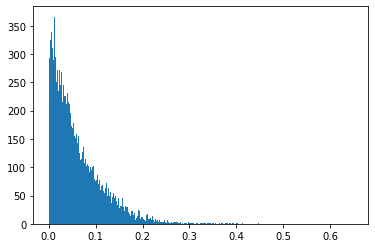

In [30]:
pab1 = pg.Prograph(csv_path="data/datasets/pab1/pab1_double_mut_processed_stardropped.csv")
plt.hist(np.abs(pab1.local_variance()),bins=1000)
plt.show()

In [12]:
gfp = pg.Prograph(csv_path="data/datasets/avGFP/avGFP_stardropped.csv",index_col=None)
plt.hist(np.abs(gfp.local_variance()),bins=1000)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'csv_path'

In [2]:
gfp = pg.Prograph(csv_path="data/datasets/avGFP/avGFP_stardropped.csv",index_col=None)
#G2 = nx.from_scipy_sparse_matrix(gfp.sparse())

100%|██████████| 6465/6465 [00:18<00:00, 342.58it/s]



            Prograph
            Number of Sequences : 51722
            Max Distance        : 16
            Longest Sequence    : 161
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green


In [36]:
model, alphabet = torch.hub.load("facebookresearch/esm", "esm1_t6_43M_UR50S")


Using cache found in /home/adam/.cache/torch/hub/facebookresearch_esm_master


In [34]:
model, alphabet = torch.hub.load("facebookresearch/esm", 'esm1_t12_85M_UR50S')


Using cache found in /home/adam/.cache/torch/hub/facebookresearch_esm_master


In [49]:
model, alphabet = torch.hub.load("facebookresearch/esm", 'esm1_t34_670M_UR50S')


Using cache found in /home/adam/.cache/torch/hub/facebookresearch_esm_master


In [6]:
def esm_sequence_embeddings(data,model,alphabet,layer):
    """
    ESM sequence embedding function. Isolates the sequence representations. 
    
    Parameters 
    ----------
    data : [(name, sequence)] or [sequence]
        The data to be processed. Can either be passed with sequence names as in fasta files,
        or can simply be passed the sequences, in which case it will assign each one a numeric 
        index.
    
    model : esm.model.ProteinBertModel
        The esm protein transformer model to use 
        
    alphabet : esm.data.Alphabet
        The protein alphabet to use.
        
    layer : int 
        The layer to extract the representation out of.
        
    return 
    """
    model = model.cuda()
    batch_converter = alphabet.get_batch_converter()
    
    print("Ensuring data is of correct type")
    if type(data[0]) != tuple:
        data = [(f"seq_{idx}",seq) for idx, seq in enumerate(data)]
    
    print("Tokenizing sequences")
    batch_labels, batch_strs, batch_tokens = batch_converter(data)

    print("Passing sequences through transformer")
    results = []
    with torch.no_grad():
        for x in tqdm.tqdm(batch_tokens):
            results.append(model(x.reshape(1,-1).cuda(), repr_layers=[layer])["representations"][layer].cpu())
    token_representations = torch.cat(results)
    
    print("Averaging sequences")
    sequence_representations = []
    for i, (_, seq) in tqdm.tqdm(enumerate(data)):
        sequence_representations.append(np.array(token_representations[i, 1 : len(seq) + 1].mean(0)))
    return sequence_representations

#X_34 = esm_sequence_embeddings(pab1("Sequence")[:10],model1,alphabet,6)

In [135]:
pab1.embedding(X_34, "esm_43M")

In [9]:
print(pab1.dirichlet(graph="43M_KNN"))
print(pab1.dirichlet(graph="85M_KNN"))
print(pab1.dirichlet(graph="670M_KNN"))

KeyboardInterrupt: 

In [10]:
print(pab1.fit(RandomForestRegressor,{"n_jobs" : 32},representation="T6_embedded"))
print(pab1.fit(RandomForestRegressor,{"n_jobs" : 32},representation="T12_embedded"))
print(pab1.fit(RandomForestRegressor,{"n_jobs" : 32},representation="T34_embedded"))

Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9532424487909585
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.6695931661031579
(0.9532424487909585, 0.6695931661031579)
Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9576588535436259
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.7016938017396459
(0.9576588535436259, 0.7016938017396459)
Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9583249683934478
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.7107994965721797
(0.9583249683934478, 0.7107994965721797)


In [13]:
print(pab1.fit(MLPRegressor,{},representation="T6_embedded"))
print(pab1.fit(MLPRegressor,{},representation="T12_embedded"))
print(pab1.fit(MLPRegressor,{},representation="T34_embedded"))

Training model MLPRegressor()
Model score on training data: 0.6771452266878965
Score of MLPRegressor() on testing data is 0.6773348939596808
(0.6771452266878965, 0.6773348939596808)
Training model MLPRegressor()
Model score on training data: 0.7501476141616248
Score of MLPRegressor() on testing data is 0.7430986231787933
(0.7501476141616248, 0.7430986231787933)
Training model MLPRegressor()
Model score on training data: 0.7859682232795735
Score of MLPRegressor() on testing data is 0.7793705231021878
(0.7859682232795735, 0.7793705231021878)


In [7]:
print(pab1.dirichlet(graph="43M_KNN"))
print(pab1.dirichlet(graph="85M_KNN"))
print(pab1.dirichlet(graph="670M_KNN"))

[[6392.740898]]
[[4890.49557854]]
[[3035.25180743]]


In [ ]:
pabknn1 = pab1.build_graph(k=10,representation="esm_43M_embedded",distance=minkowski,similarity=True)
#knn2 = datasets[i].build_graph(k=10,representation="T12_embedded",distance=minkowski,similarity=True)
#knn3 = datasets[i].build_graph(k=10,representation="T34_embedded",distance=minkowski,similarity=True)

pab1.graph["43M_KNN"]  = pabknn1

In [32]:
ks = range(5,55,5)
list(ks)


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [11]:
reps = ["T6_embedded", "T12_embedded", "T34_embedded"]
ks = range(5,55,5)

def compute_knn_dirichlets(pgraph, reps, ks=[10]):
    results = {key : [] for key in reps}
    for k in ks:
        print(k)
        for rep in reps:
            graph_name = rep.split("_")[0] + f"_KNN_{k}"
            pgraph.graph[graph_name] = pgraph.build_graph(k=k,representation=rep,distance=minkowski,similarity=True)
            results[rep].append(pgraph.dirichlet(graph=graph_name))
    return results, ks

#results, ks = compute_knn_dirichlets(pab1, reps, ks)

In [50]:
save_obj(results, "knn_dirichlets")

File Saved Successfully


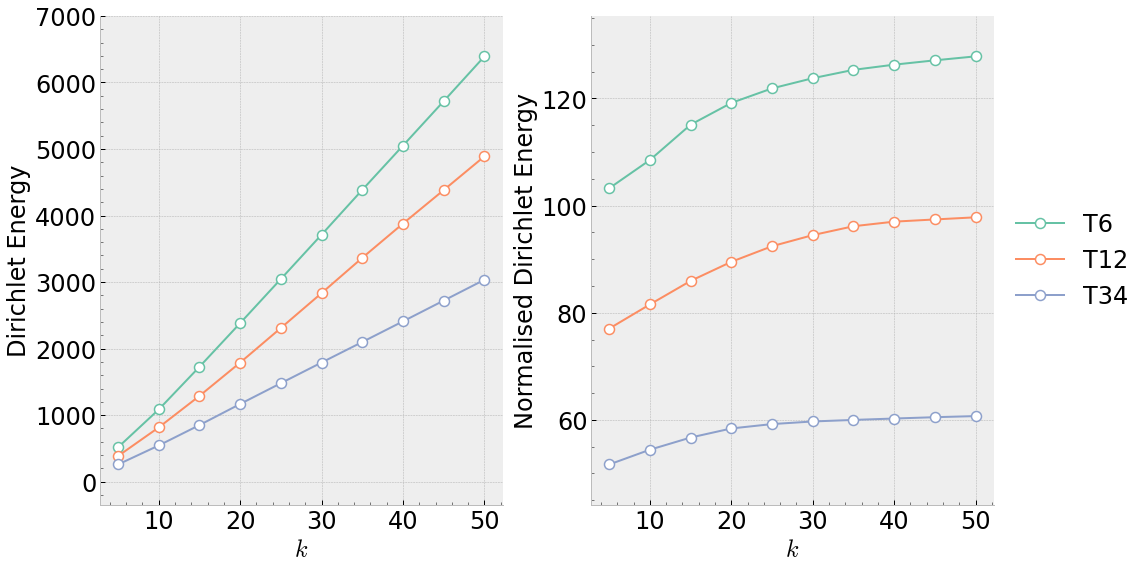

In [47]:
# Stylesheets defined in Matplotlib
plt.style.use('bmh')
cols = ['#66c2a5','#fc8d62','#8da0cb']

fig, axs = plt.subplots(1,2, figsize=(16,8))

for i in range(3):
    res = np.array(results[reps[i]]).flatten()
    axs[0].plot(ks,res, marker="o", label=reps[i], markersize=10, c=cols[i])
    axs[1].plot(ks, [r/k for r, k in zip(res, ks)], marker="o", label=reps[i].replace("_embedded",""), markersize=10, c=cols[i])

axs[1].legend(frameon=False, fontsize=24, bbox_to_anchor=(1,0.5), loc="center left")
axs[0].set_ylabel("Dirichlet Energy", fontsize=24)
axs[1].set_ylabel("Normalised Dirichlet Energy", fontsize=24)
axs[0].set_xlabel("$k$", fontsize=24)
axs[1].set_xlabel("$k$", fontsize=24)

plt.tight_layout()
plt.savefig("KNN Scaling Plot.svg", bbox_inches="tight")
plt.savefig("KNN Scaling Plot.pdf", bbox_inches="tight")

In [10]:
def compute_knn_dirichlets(pgraph, reps, ks=[10]):
    results = {key : [] for key in reps}
    for k in ks:
        print(k)
        for rep in reps:
            graph_name = rep.split("_")[0] + f"_KNN_{k}"
            pgraph.graph[graph_name] = pgraph.build_graph(k=k,representation=rep,distance=minkowski,similarity=True)
            results[rep].append(pgraph.dirichlet(graph=graph_name))
    return results, ks

def test_model_performance(pgraph, model, reps, k = 50, *args, **kwargs):
    model_performance = []
    for rep in reps:
        model_performance.append(pgraph.fit(model, kwargs , representation=rep))
    return model_performance

#mlp_results = test_model_performance(pab1, MLPRegressor, reps, k=50) 

In [10]:
def compute_knn_dirichlets(pgraph, reps, ks=[50]):
    results = {key : [] for key in reps}
    for k in ks:
        print(k)
        for rep in reps:
            graph_name = rep.split("_")[0] + f"_KNN_{k}"
            pgraph.graph[graph_name] = pgraph.build_graph(k=k,representation=rep,distance=minkowski,similarity=True)
            results[rep].append(pgraph.dirichlet(graph=graph_name))
    return results, ks

In [135]:
gfp_dirichlets = compute_knn_dirichlets(gfp, reps, ks=[50])

50


100%|███████████████████████████████████████████████████████████████████████████████████████████| 6466/6466 [01:16<00:00, 84.36it/s]


({'T6_embedded': [array([[29424.13168836]])],
  'T12_embedded': [array([[36456.93322376]])],
  'T34_embedded': [array([[24606.24459095]])]},
 [50])

NameError: name 'gfp' is not defined

In [17]:
gfp_dirichlets = [29424.13168836, 36456.93322376, 24606.24459095]

In [9]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {"MLP" : (MLPRegressor, {}), 
          "KRR" : (KernelRidge, {}), 
          "RF" : (RandomForestRegressor, {"n_jobs" : 24}), 
          #"GBR" : gbr_results, 
          "KNNR" : (KNeighborsRegressor, {"n_jobs" : 24})}

def test_models(pgraph, models, reps, k=50, *args, **kwargs):
    model_results = {}
    for model in models.keys():
        print(f"Testing {model}")
        model_results[model] = test_model_performance(pgraph, models[model][0], reps, k=50, **models[model][1]) 
    return model_results
    

In [5]:
#gfp = pg.Prograph(file="data/datasets/avGFP/avGFP_stardropped_pgraph.pkl")
#gb1 = pg.Prograph(file="data/datasets/gb1/G_Protein_Clean_Sequences_pgraph.pkl")
#pg.Prograph(file="data/datasets/pab1/pab1_double_mut_processed_stardropped_pgraph.pkl"),
ube = pg.Prograph(file="data/datasets/ube4b/ube4b_clean_pgraph.pkl")


            Prograph
            Number of Sequences : 91031
            Max Distance        : 12
            Longest Sequence    : 102
            Number of Distances : 12
            Seed Sequence       : IEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTVLDRSIILRHLLYSPTDPFTRQILTESMLEPVPELKEQIQAWMREKQSSDH
                Modified positions are shown in green


In [14]:
gfp_model_results = test_models(gfp, models, reps, k=50)

Testing MLP
Training model MLPRegressor()
Model score on training data: 0.5308634896148055
Score of MLPRegressor() on testing data is 0.5132957365434893
Training model MLPRegressor()
Model score on training data: 0.5603993358763424
Score of MLPRegressor() on testing data is 0.5420013968930428
Training model MLPRegressor()
Model score on training data: 0.6168631264854894
Score of MLPRegressor() on testing data is 0.6021310712836931
Testing KRR
Training model KernelRidge()
Model score on training data: 0.5988204205848067
Score of KernelRidge() on testing data is 0.588661415258624
Training model KernelRidge()
Model score on training data: 0.5917766706763271
Score of KernelRidge() on testing data is 0.5780195863526745
Training model KernelRidge()
Model score on training data: 0.635697256505829
Score of KernelRidge() on testing data is 0.6063490344417151
Testing RF
Training model RandomForestRegressor(n_jobs=24)
Model score on training data: 0.9204135025780661
Score of RandomForestRegressor

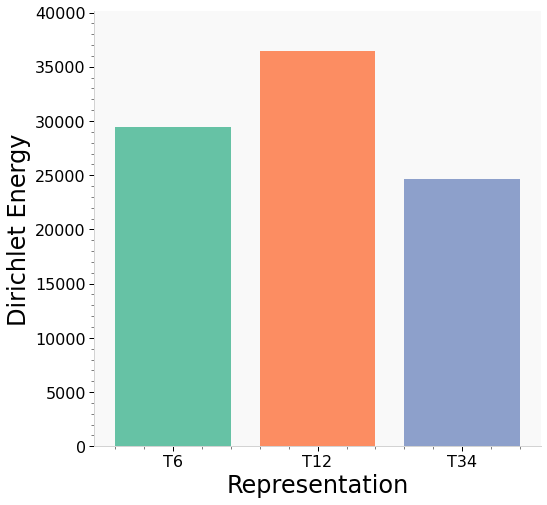

In [38]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.bar(range(3), gfp_dirichlets, color=cols)
ax.set_ylabel("Dirichlet Energy", fontsize=24)
ax.set_xticks(range(3))
ax.set_xticklabels(["T6", "T12", "T34"], fontsize=20)
ax.set_xlabel("Representation", fontsize=24)

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.savefig("GFP_Dirichlet.pdf", bbox_inches="tight")

plt.savefig("GFP_Dirichlet.svg", bbox_inches="tight")

In [41]:
pab1_dirichlets = compute_knn_dirichlets(pab1, reps, ks=[50])


50


100%|██████████████████████████████████████████████████████████████████████████████████████████| 4566/4566 [00:36<00:00, 123.63it/s]


In [50]:
 [val[0][0][0] for val in pab1_dirichlets[0].values()]

[6392.740898002258, 4890.495578538799, 3035.2518074292657]

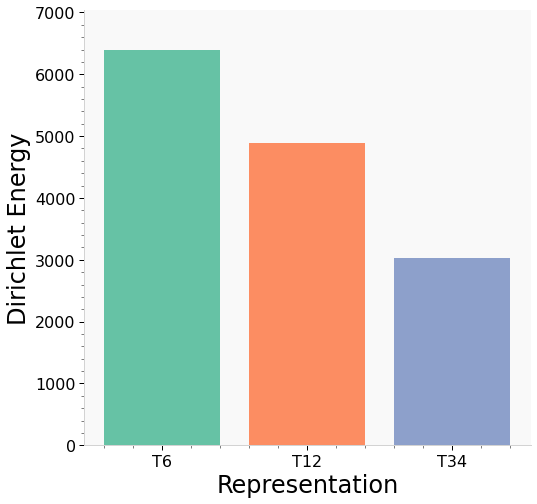

In [51]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.bar(range(3),   [val[0][0][0] for val in pab1_dirichlets[0].values()], color=cols)
ax.set_ylabel("Dirichlet Energy", fontsize=24)
ax.set_xticks(range(3))
ax.set_xticklabels(["T6", "T12", "T34"], fontsize=20)
ax.set_xlabel("Representation", fontsize=24)

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.savefig("Pab1_Dirichlet.pdf", bbox_inches="tight")
plt.savefig("Pab1_Dirichlet.svg", bbox_inches="tight")

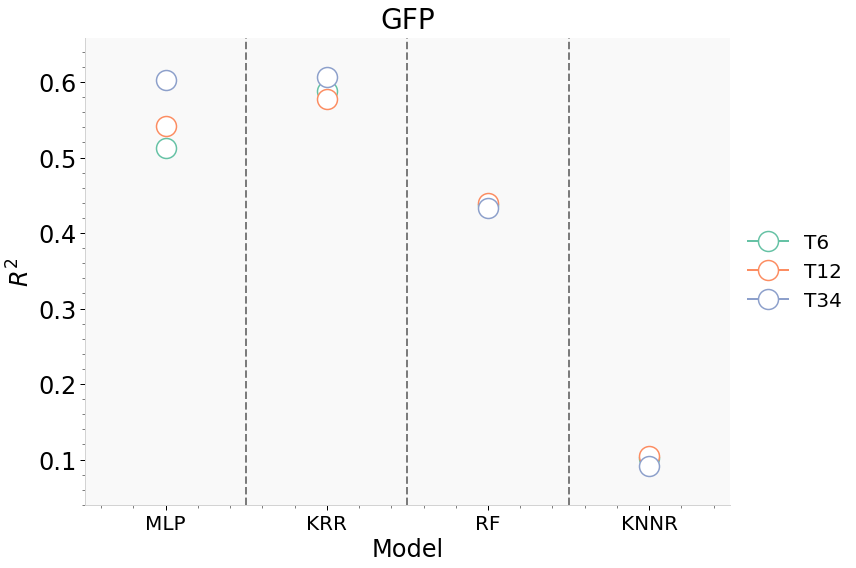

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

cols = ['#66c2a5','#fc8d62','#8da0cb']

for idx, (model, results) in enumerate(gfp_model_results.items()):
    for j,res in enumerate(results):
        if idx == len(models) - 1:
            label = reps[j].split("_")[0]
        else:
            label = None
        ax.plot(idx, res[1], label=label, c=cols[j], marker="o", markersize=20)

    if idx < (len(models) - 1):
        ax.axvline(idx+0.5, c="k", alpha=0.5, linestyle="--")
#ax.set_yticks([0.60,0.65,0.70,0.75,0.80])
#ax.set_yticklabels([0.60,0.65,0.70,0.75,0.80], fontsize=20)
ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(models.keys(), fontsize=20)
ax.set_title("GFP", fontsize=28, pad=10)
ax.set_ylabel("$R^2$", fontsize=24)
ax.set_xlabel("Model", fontsize=24)

ax.legend(frameon=False, fontsize=20, bbox_to_anchor=(1.,0.5), loc="center left")

plt.tight_layout()
plt.savefig("GFP_Transfer_Learning.svg", bbox_inches="tight")
plt.savefig("GFP_Transfer_Learning.pdf", bbox_inches="tight")

In [15]:
save_obj(gfp_model_results,"gfp_model_results.pkl")

File Saved Successfully


In [ ]:
ube_model_results = test_models(ube, models, reps, k=50)

Testing MLP
Training model MLPRegressor()
Model score on training data: 0.21879688799771002
Score of MLPRegressor() on testing data is 0.13844231955211939
Training model MLPRegressor()
Model score on training data: 0.11538715997514792
Score of MLPRegressor() on testing data is 0.08904685174662952
Training model MLPRegressor()
Model score on training data: 0.14670028593099782
Score of MLPRegressor() on testing data is 0.11435432270777746
Testing KRR
Training model KernelRidge()
Model score on training data: 0.1522829620767343
Score of KernelRidge() on testing data is 0.11641892329186598
Training model KernelRidge()
Model score on training data: 0.16006781408653792
Score of KernelRidge() on testing data is 0.12631301366562997
Training model KernelRidge()
Model score on training data: 0.18383969113850906
Score of KernelRidge() on testing data is 0.1243922288615904
Testing RF
Training model RandomForestRegressor(n_jobs=24)
Model score on training data: 0.8715780357695546
Score of RandomFor

In [ ]:
save_obj(ube_model_results,"ube_model_results.pkl")

In [19]:
gfp_model_results = load_obj("gfp_model_results.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'gfp_model_results.pkl'

In [58]:
krr_results = test_model_performance(pab1, KernelRidge, reps, k=50) 

Training model KernelRidge()
Model score on training data: 0.7235241757953246
Score of KernelRidge() on testing data is 0.7195515295713479
Training model KernelRidge()
Model score on training data: 0.7476007206011914
Score of KernelRidge() on testing data is 0.7353148312928629
Training model KernelRidge()
Model score on training data: 0.7940592915511911
Score of KernelRidge() on testing data is 0.7749344361765307


In [60]:
rf_results = test_model_performance(pab1, RandomForestRegressor, reps, k=50, n_jobs=32)

Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9531021279621658
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.66955478921
Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9569603612358881
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.700841320942733
Training model RandomForestRegressor(n_jobs=32)
Model score on training data: 0.9581909348808861
Score of RandomForestRegressor(n_jobs=32) on testing data is 0.7091994751219484


In [85]:
gbr_results = test_model_performance(pab1, GradientBoostingRegressor, reps, k=50)

Training model GradientBoostingRegressor()


KeyboardInterrupt: 

In [88]:
from sklearn.utils.testing import all_estimators
from sklearn import base

estimators = all_estimators()

for name, class_ in estimators:
    if issubclass(class_, base.RegressorMixin):
        print(name)

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GammaRegressor
GaussianProcessRegressor
GeneralizedLinearRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiOutputRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
RegressorChain
Ridge
RidgeCV
SGDRegressor
SVR
StackingRegressor
TheilSenRegressor
TransformedTargetRegressor
TweedieRegressor
VotingRegressor
_SigmoidCalibration


In [64]:
knnr = test_model_performance(pab1, KNeighborsRegressor, reps, k=50, n_jobs=24)

Training model KNeighborsRegressor(n_jobs=24)
Model score on training data: 0.7794139885948496
Score of KNeighborsRegressor(n_jobs=24) on testing data is 0.6650685166997286
Training model KNeighborsRegressor(n_jobs=24)
Model score on training data: 0.8029666370336072
Score of KNeighborsRegressor(n_jobs=24) on testing data is 0.7058988402077738
Training model KNeighborsRegressor(n_jobs=24)
Model score on training data: 0.8075308567334589
Score of KNeighborsRegressor(n_jobs=24) on testing data is 0.7074987888354107


In [136]:
pab1_model_results = {"MLP" : mlp_results, 
          "KRR" : krr_results, 
          "RF" : rf_results, 
          #"GBR" : gbr_results, 
          "KNNR" : knnr}

In [137]:
#save_obj(pab1_model_results, "pab1_model_results")

File Saved Successfully


In [1]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

for idx, (model, results) in enumerate(pab1_model_results.items()):
    for j,res in enumerate(results):
        if idx == len(models) - 1:
            label = reps[j].split("_")[0]
        else:
            label = None
        ax.plot(idx, res[1], label=label, c=cols[j], marker="o", markersize=20)

    if idx < (len(models) - 1):
        ax.axvline(idx+0.5, c="k", alpha=0.5, linestyle="--")
ax.set_yticks([0.60,0.65,0.70,0.75,0.80])
ax.set_yticklabels([0.60,0.65,0.70,0.75,0.80], fontsize=20)
ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(models.keys(), fontsize=20)
ax.set_title("Pab1", fontsize=28, pad=10)
ax.set_ylabel("$R^2$", fontsize=24)
ax.set_xlabel("Model", fontsize=24)

ax.legend(frameon=False, fontsize=20, bbox_to_anchor=(1.,0.5), loc="center left")

plt.tight_layout()
plt.savefig("Pab1_Transfer_Learning.svg", bbox_inches="tight")
plt.savefig("Pab1_Transfer_Learning.pdf", bbox_inches="tight")

NameError: name 'plt' is not defined

In [20]:
X = esm_sequence_embeddings(test("Sequence"),model,alphabet)

  0%|          | 1/1000 [00:00<02:02,  8.13it/s]

Ensuring data is of correct type
Tokenizing sequences
Passing sequences through transformer


100%|██████████| 1000/1000 [00:03<00:00, 262.01it/s]
1000it [00:00, 81099.50it/s]

Averaging sequences


In [20]:
import numpy.testing as npt

In [14]:
def esm_sequence_embeddings(data,model,alphabet,layer):
    """
    ESM sequence embedding function. Isolates the sequence representations. 
    
    Parameters 
    ----------
    data : [(name, sequence)] or [sequence]
        The data to be processed. Can either be passed with sequence names as in fasta files,
        or can simply be passed the sequences, in which case it will assign each one a numeric 
        index.
    
    model : esm.model.ProteinBertModel
        The esm protein transformer model to use 
        
    alphabet : esm.data.Alphabet
        The protein alphabet to use.
        
    layer : int 
        The layer to extract the representation out of.
        
    return 
    """
    model = model.cuda()
    batch_converter = alphabet.get_batch_converter()
    
    print("Ensuring data is of correct type")
    if type(data[0]) != tuple:
        data = [(f"seq_{idx}",seq) for idx, seq in enumerate(data)]
    
    print("Tokenizing sequences")
    batch_labels, batch_strs, batch_tokens = batch_converter(data)

    print("Passing sequences through transformer")
    results = []
    with torch.no_grad():
        for seq,token in tqdm.tqdm(zip(batch_strs,batch_tokens)):
            tensor = model(token.reshape(1,-1).cuda(), repr_layers=[layer])["representations"][layer].cpu()
            results.append(np.array(tensor[0,1 : len(seq) + 1].mean(0)))

    return results

Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm1_t6_43M_UR50S.pt" to /home/acm/.cache/torch/hub/checkpoints/esm1_t6_43M_UR50S.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm1_t6_43M_UR50S-contact-regression.pt" to /home/acm/.cache/torch/hub/checkpoints/esm1_t6_43M_UR50S-contact-regression.pt


['protein1', 'protein2'] ['MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG', 'KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE'] tensor([[32, 20, 15, 11,  7, 10, 16,  9, 10,  4, 15,  8, 12,  7, 10, 12,  4,  9,
         10,  8, 15,  9, 14,  7,  8,  6,  5, 16,  4,  5,  9,  9,  4,  8,  7,  8,
         10, 16,  7, 12,  7, 16, 13, 12,  5, 19,  4, 10,  8,  4,  6, 19, 17, 12,
          7,  5, 11, 14, 10,  6, 19,  7,  4,  5,  6,  6,  1,  1,  1,  1,  1,  1],
        [32, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 21,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9]])


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


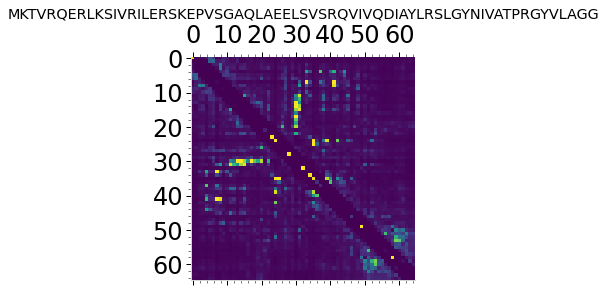

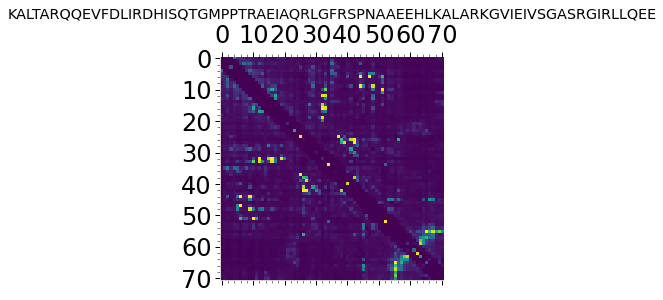

In [108]:
import torch
import esm

#model, alphabet = torch.hub.load("facebookresearch/esm", "esm1b_t33_650M_UR50S")
#model1, alphabet1 = torch.hub.load("facebookresearch/esm", "esm1_t6_43M_UR50S")
#model2, alphabet2 = torch.hub.load("facebookresearch/esm", "esm1_t12_85M_UR50S")
#model3, alphabet3 = torch.hub.load("facebookresearch/esm", 'esm1_t34_670M_UR50S')


# Load ESM-1b model
model, alphabet = esm.pretrained.esm1_t6_43M_UR50S()
batch_converter = alphabet.get_batch_converter()

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

print(batch_labels, batch_strs, batch_tokens)

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)
token_representations = results["representations"][6]

# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()

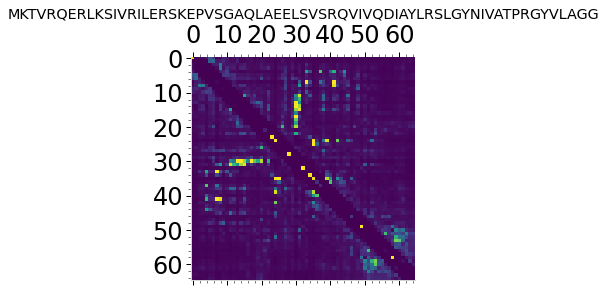

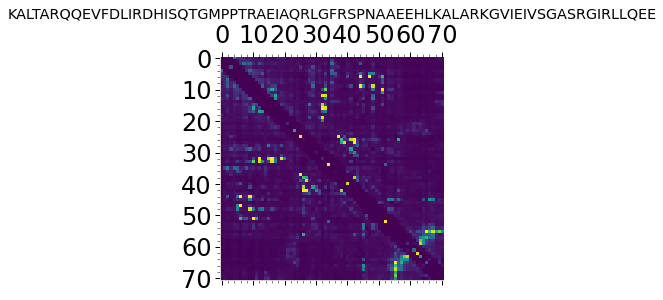

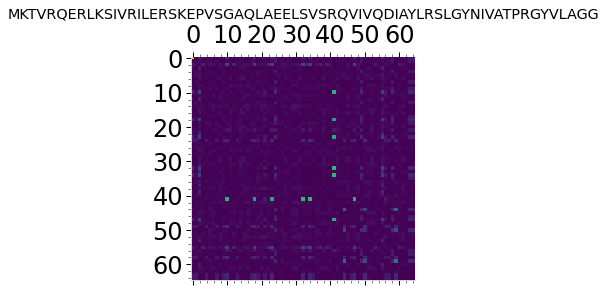

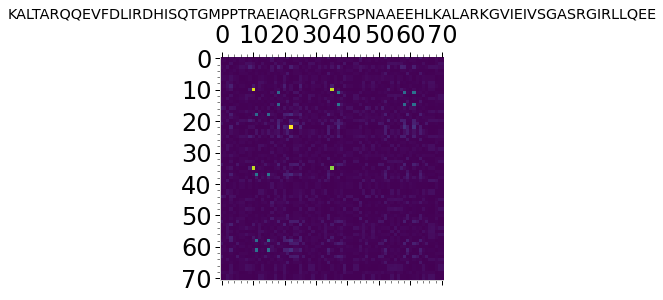

In [109]:
# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)
token_representations = results["representations"][6]

# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()
    
for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()   
        
# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)
token_representations = results["representations"][6]

# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()

In [110]:
gfp = pg.Prograph(file="data/datasets/avGFP/avGFP_stardropped.csv",index_col=None)

model1, alphabet1 = torch.hub.load("facebookresearch/esm", "esm1_t6_43M_UR50S")
model2, alphabet2 = torch.hub.load("facebookresearch/esm", "esm1_t12_85M_UR50S")
model3, alphabet3 = torch.hub.load("facebookresearch/esm", 'esm1_t34_670M_UR50S')

models = [model1,model2,model3]
alphabets = [alphabet1,alphabet2,alphabet3]


for model,alphabet,name,layer in zip(models,alphabets,["T6","T12","T34"],[6,12,34]):
    model.embedding(esm_sequence_embeddings(model("Sequence"),model,alphabet,layer),name)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 6466/6466 [00:20<00:00, 321.85it/s]



            Prograph
            Number of Sequences : 51722
            Max Distance        : 16
            Longest Sequence    : 161
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green


Downloading: "https://github.com/facebookresearch/esm/archive/main.zip" to /home/acm/.cache/torch/hub/main.zip
Using cache found in /home/acm/.cache/torch/hub/facebookresearch_esm_main
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm1_t12_85M_UR50S.pt" to /home/acm/.cache/torch/hub/checkpoints/esm1_t12_85M_UR50S.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm1_t12_85M_UR50S-contact-regression.pt" to /home/acm/.cache/torch/hub/checkpoints/esm1_t12_85M_UR50S-contact-regression.pt
Using cache found in /home/acm/.cache/torch/hub/facebookresearch_esm_main
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm1_t34_670M_UR50S.pt" to /home/acm/.cache/torch/hub/checkpoints/esm1_t34_670M_UR50S.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm1_t34_670M_UR50S-contact-regression.pt" to /home/acm/.cache/torch/hub/checkpoints/esm1_t34_670M_UR50S-contact-regression.pt


AttributeError: 'ProteinBertModel' object has no attribute 'embedding'

In [1]:
gfp

NameError: name 'gfp' is not defined

In [53]:
datasets = [pg.Prograph(file="data/datasets/avGFP/avGFP_stardropped.csv",index_col=None),
            pg.Prograph(file="data/datasets/gb1/G_Protein_Clean_Sequences.csv"),
            pg.Prograph(file="data/datasets/pab1/pab1_double_mut_processed_stardropped.csv"),
            pg.Prograph(file="data/datasets/ube4b/ube4b_clean.csv",index_col=None)]

model1, alphabet1 = torch.hub.load("facebookresearch/esm", "esm1_t6_43M_UR50S")
model2, alphabet2 = torch.hub.load("facebookresearch/esm", "esm1_t12_85M_UR50S")
model3, alphabet3 = torch.hub.load("facebookresearch/esm", 'esm1_t34_670M_UR50S')

models = [model1,model2,model3]
alphabets = [alphabet1,alphabet2,alphabet3]

for dataset in datasets:
    for model,alphabet,name,layer in zip(models,alphabets,["T6","T12","T34"],[6,12,34]):
        dataset.embedding(esm_sequence_embeddings(dataset("Sequence"),model,alphabet,layer),name)
    pg.utils.save(dataset)



100%|██████████| 6466/6466 [00:20<00:00, 314.55it/s]



            Prograph
            Number of Sequences : 51722
            Max Distance        : 16
            Longest Sequence    : 161
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green


100%|██████████| 66990/66990 [12:31<00:00, 89.12it/s]



            Prograph
            Number of Sequences : 535917
            Max Distance        : 4
            Longest Sequence    : 56
            Number of Distances : 5
            Seed Sequence       : MAAKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE
                Modified positions are shown in green


100%|██████████| 4566/4566 [00:05<00:00, 887.52it/s]



            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


100%|██████████| 11379/11379 [00:39<00:00, 286.72it/s]



            Prograph
            Number of Sequences : 91031
            Max Distance        : 12
            Longest Sequence    : 102
            Number of Distances : 12
            Seed Sequence       : IEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTVLDRSIILRHLLYSPTDPFTRQILTESMLEPVPELKEQIQAWMREKQSSDH
                Modified positions are shown in green


Using cache found in /home/adam/.cache/torch/hub/facebookresearch_esm_master
Using cache found in /home/adam/.cache/torch/hub/facebookresearch_esm_master
Using cache found in /home/adam/.cache/torch/hub/facebookresearch_esm_master


Ensuring data is of correct type
Tokenizing sequences


0it [00:00, ?it/s]

Passing sequences through transformer


51722it [03:39, 236.08it/s]


Ensuring data is of correct type
Tokenizing sequences


0it [00:00, ?it/s]

Passing sequences through transformer


51722it [06:55, 124.58it/s]


Ensuring data is of correct type
Tokenizing sequences


0it [00:00, ?it/s]

Passing sequences through transformer


51722it [31:52, 27.05it/s]


Saving Graph to avGFP_stardropped_pgraph.pkl
Ensuring data is of correct type
Tokenizing sequences
Passing sequences through transformer


535917it [37:54, 235.61it/s]


Ensuring data is of correct type
Tokenizing sequences
Passing sequences through transformer


535917it [1:11:48, 124.39it/s]


Ensuring data is of correct type
Tokenizing sequences
Passing sequences through transformer


535917it [3:12:50, 46.32it/s]


Saving Graph to G_Protein_Clean_Sequences_pgraph.pkl
Ensuring data is of correct type
Tokenizing sequences


20it [00:00, 196.02it/s]

Passing sequences through transformer


36522it [02:33, 237.89it/s]


Ensuring data is of correct type
Tokenizing sequences


14it [00:00, 131.49it/s]

Passing sequences through transformer


36522it [04:54, 123.97it/s]


Ensuring data is of correct type
Tokenizing sequences


36522it [14:05, 43.17it/s]


Passing sequences through transformer
Saving Graph to pab1_double_mut_processed_stardropped_pgraph.pkl
Ensuring data is of correct type
Tokenizing sequences


24it [00:00, 237.78it/s]

Passing sequences through transformer


91031it [06:27, 235.21it/s]


Ensuring data is of correct type
Tokenizing sequences


13it [00:00, 129.59it/s]

Passing sequences through transformer


91031it [12:06, 125.27it/s]


Ensuring data is of correct type
Tokenizing sequences


3it [00:00, 26.83it/s]

Passing sequences through transformer


91031it [45:59, 32.98it/s]


Saving Graph to ube4b_clean_pgraph.pkl


In [5]:
model(batch_tokens[0].reshape(1,-1).cuda(), repr_layers=[33], return_contacts=True)["representations"][33]

tensor([[[-0.0740,  0.0822,  0.2193,  ..., -0.0044,  0.0492, -0.1227],
         [ 0.0798,  0.0540,  0.1084,  ..., -0.0505, -0.3083, -0.0727],
         [ 0.2959, -0.4730, -0.0036,  ..., -0.0741, -0.0356,  0.2300],
         ...,
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165],
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165],
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165]]],
       device='cuda:0', grad_fn=<TransposeBackward0>)

In [11]:
data = [(f"pab1_{idx}",seq) for idx, seq in enumerate(pab1("Sequence")[:1000])]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

results = []
with torch.no_grad():
    for x in tqdm.tqdm(batch_tokens):
        results.append(model(x.reshape(1,-1).cuda(), repr_layers=[33], return_contacts=True)["representations"][33])
token_representations = results#["representations"][33]


100%|██████████| 1000/1000 [00:20<00:00, 47.83it/s]
0it [00:00, ?it/s]


TypeError: list indices must be integers or slices, not tuple

In [27]:
token_representations = torch.cat([x.cpu() for x in token_representations])

In [34]:
sequence_representations = []
for i, (_, seq) in tqdm.tqdm(enumerate(data)):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))


1000it [00:00, 27248.83it/s]


In [37]:
A = np.array([x.numpy() for x in sequence_representations])


/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


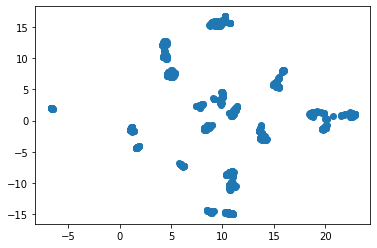

In [38]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap 


reducer = umap.UMAP()
scaled = StandardScaler().fit_transform(A)

embedding = reducer.fit_transform(scaled)
plt.scatter(*embedding.T)

In [32]:
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)

In [35]:
pab1 = pg.Prograph(csv_path="data/datasets/pab1/pab1_double_mut_processed_stardropped.csv")
#G3 = nx.from_scipy_sparse_matrix(pab1.sparse())

100%|██████████| 4565/4565 [00:04<00:00, 945.38it/s]



            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


(array([5.2000e+01, 1.0800e+02, 1.5660e+03, 8.2750e+03, 1.6198e+04,
        8.0910e+03, 2.0000e+03, 1.8000e+02, 4.3000e+01, 9.0000e+00]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

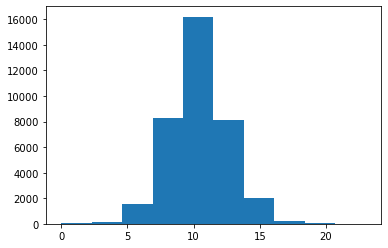

In [71]:
degree_sequence = sorted([d for n, d in G3.degree()], reverse=True)
plt.hist(degree_sequence)

In [77]:
hold = [len(c) for c in sorted(nx.connected_components(G3), key=len)]

In [5]:
print(4500000/(100000*100000))

0.00045


In [10]:
datasets = [
    pg.Prograph(csv_path="data/datasets/avGFP/avGFP_stardropped.csv",index_col=None),
    pg.Prograph(csv_path="data/datasets/blac/Blac_EC50_Cleaned.csv"),
    pg.Prograph(csv_path="data/datasets/gb1/G_Protein_Clean_Sequences.csv"),
    pg.Prograph(csv_path="data/datasets/pab1/pab1_double_mut_processed_stardropped.csv"),
    pg.Prograph(csv_path="data/datasets/TF/TF_NEWROS_Cleaned.csv",index_col=None),
    pg.Prograph(csv_path="data/datasets/ube4b/ube4b_clean.csv",index_col=None)
]

100%|██████████| 6465/6465 [00:19<00:00, 335.24it/s]



            Prograph
            Number of Sequences : 51722
            Max Distance        : 16
            Longest Sequence    : 161
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green


100%|██████████| 653/653 [00:00<00:00, 1690.43it/s]



            Prograph
            Number of Sequences : 5230
            Max Distance        : 2
            Longest Sequence    : 266
            Number of Distances : 3
            Seed Sequence       : AFKLLSKLLVYLTASIMAIASPLAFSVDSSGEYPTVSEIPVGEVRLYQIADGVWSHIATQSFDGAVYPSNGLIVRDGDELLLIDTAWGAKNTAALLAEIEKQIGLPVTRAVSTHFHDDRVGGVDVLRAAGVATYASPSTRRLAEVEGNEIPTHSLEGLSSSGDAVRFGPVELFYPGAAHSTDNLIVYVPSASVLYGGCAIYELSRTSAGNVADADLAEWPTSIERIQQHYPEAQFVIPGHGLPGGLDLLKHTTNVVKAHTNRSVVE
                Modified positions are shown in green


100%|██████████| 66989/66989 [12:02<00:00, 92.72it/s]



            Prograph
            Number of Sequences : 535917
            Max Distance        : 4
            Longest Sequence    : 56
            Number of Distances : 5
            Seed Sequence       : MAAKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE
                Modified positions are shown in green


100%|██████████| 116/116 [00:00<00:00, 7059.48it/s]


            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green

            Prograph
            Number of Sequences : 935
            Max Distance        : 57
            Longest Sequence    : 59
            Number of Distances : 40
            Seed Sequence       : KPITLYDVARHAGVSYQTVSRVINQAAHVSTRTREKVEQAMAELHYVPNRVAQQLAGKQ
                Modified positions are shown in green



100%|██████████| 11378/11378 [00:37<00:00, 307.04it/s]



            Prograph
            Number of Sequences : 91031
            Max Distance        : 12
            Longest Sequence    : 102
            Number of Distances : 12
            Seed Sequence       : IEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTVLDRSIILRHLLYSPTDPFTRQILTESMLEPVPELKEQIQAWMREKQSSDH
                Modified positions are shown in green


In [17]:
[pg.utils.save(x) for x in datasets]

Saving Graph to avGFP_stardropped_pgraph.csv
Saving Graph to Blac_EC50_Cleaned_pgraph.csv
Saving Graph to G_Protein_Clean_Sequences_pgraph.csv
Saving Graph to pab1_double_mut_processed_stardropped_pgraph.csv
Saving Graph to TF_NEWROS_Cleaned_pgraph.csv
Saving Graph to ube4b_clean_pgraph.csv


[True, True, True, True, True, True]

In [4]:
from scipy.spatial.distance import cdist
import cProfile

         11 function calls in 0.620 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.015    0.015    0.620    0.620 <string>:1(<module>)
        1    0.010    0.010    0.605    0.605 hamming.py:8(hamming)
        1    0.000    0.000    0.097    0.097 tensor.py:25(wrapped)
        1    0.000    0.000    0.000    0.000 utils.py:7(clean_input)
        2    0.000    0.000    0.000    0.000 {built-in method as_tensor}
        1    0.000    0.000    0.620    0.620 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.497    0.497    0.497    0.497 {built-in method sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.097    0.097    0.097    0.097 {method 'ne' of 'torch._C._TensorBase' objects}




In [5]:
Z = land.tokenized

In [50]:
def get_every_n(a, n=2):
    """
    Splits an array (numpy or pytorch) into chunks of size n and returns a generator.
    """
    for i in range(a.shape[0] // n):
        yield a[n*i:n*(i+1)]

gpu_tokenized = torch.as_tensor(Z.astype(np.float16),dtype=torch.float16,device=torch.device("cuda:0"))

batch_size=1000
import operator
comp = operator.eq
eps = 1

results = []
for batch in tqdm.tqdm(list(get_every_n(gpu_tokenized,n=batch_size))):
    results.append([x.cpu().numpy() for x in torch.where(comp(pg.distance.hamming(gpu_tokenized,batch),eps))])

100%|██████████| 100/100 [00:03<00:00, 25.67it/s]


In [ ]:
results = []
for batch in tqdm.tqdm(list(get_every_n(Z,n=batch_size))):
    results.append([x for x in np.where(comp(cdist(Z,batch,metric="hamming"),eps))])

 52%|█████▏    | 52/100 [00:45<00:55,  1.15s/it]

In [113]:
from scipy.spatial import cKDTree

In [119]:
tree = cKDTree(gfp.tokenized)

In [124]:
gfp.tokenized[0]

array([11,  9, 14,  7,  3,  5,  5,  9, 16,  1, 11, 13,  4,  6, 20, 18, 14,
        4, 15, 17,  8,  5,  5,  9,  3,  3,  6, 12, 20,  9, 17, 15,  3,  4,
       18,  9,  5,  4,  6,  3, 17, 10, 18, 12, 15,  8,  4, 10,  9,  6,  8,
        3,  5,  9,  4,  3,  6, 12,  8, 10,  6,  7,  9, 10,  4, 20, 12, 20,
       12, 16,  7, 12, 18, 20,  8, 11,  1,  3,  9, 14,  9, 12,  6,  8,  9,
       18, 12,  5,  9,  8, 15,  7, 12,  8,  4,  3,  6, 16, 18, 14, 10,  1,
        3,  7, 20, 14, 14, 12, 17, 13,  8,  6,  3,  6, 13, 18, 10, 10, 13,
        3, 12,  7, 20, 10, 16, 17, 14, 16,  1, 10, 16,  9,  3, 13, 12,  4,
        9, 15,  3,  7, 11, 18, 10, 10,  4,  5, 18, 17,  1,  1,  6,  8, 17,
        7,  6, 11,  3,  4, 10, 20,  9])

In [130]:
for i in tqdm.tqdm(range(len(gfp.tokenized))):
    tree.query_ball_point(gfp.tokenized[i],r=1)



  1%|          | 371/51722 [00:22<52:33, 16.29it/s]  


KeyboardInterrupt: 

In [7]:
X = land.tokenized[:1000]
Y = land.tokenized[:100000]

cProfile.run("pg.distance.hamming(X,Y)")
cProfile.run("cdist(X,Y,metric='hamming')")

         78 function calls (76 primitive calls) in 0.440 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_1d)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copyto)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(vstack)
        1    0.001    0.001    0.440    0.440 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 _asarray.py:139(ascontiguousarray)
        3    0.000    0.000    0.000    0.000 _asarray.py:14(asarray)
        3    0.000    0.000    0.000    0.000 _asarray.py:86(asanyarray)
        1

In [19]:
from scipy import sparse 

#A = sparse.coo_matrix((V,(I,J)),shape=(4,4))

land("Neighbours")

mtx = sparse.lil_matrix((100000,100000))

In [7]:
gfp = pg.Prograph(csv_path="data/datasets/avGFP/avGFP_stardropped.csv",index_col=None)

100%|██████████| 6465/6465 [00:19<00:00, 326.35it/s]



            Prograph
            Number of Sequences : 51722
            Max Distance        : 16
            Longest Sequence    : 161
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green


In [41]:
from scipy import sparse

hold = gfp("Neighbours")

I = []
V = []
for i,J in enumerate(hold):
    I.append(np.zeros(len(J),dtype=int) + 1*i)
    V.append(np.ones(len(J),dtype=int)/ len(J))
I = np.concatenate(I)
J = np.concatenate(hold.to_numpy())
V = np.concatenate(V)
D = sparse.coo_matrix((V,(I,J)),shape=(len(gfp),len(gfp)))


In [104]:
test = pg.Prograph("data/synthetic_data.csv")

100%|██████████| 125/125 [00:00<00:00, 5912.00it/s]


            Prograph
            Number of Sequences : 1000
            Max Distance        : 3
            Longest Sequence    : 3
            Number of Distances : 4
            Seed Sequence       : AAA
                Modified positions are shown in green


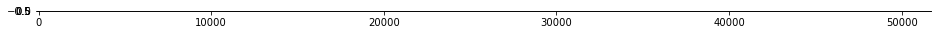

In [97]:
initial = np.zeros(len(hold))

initial[0] = 10000
fig = plt.figure(figsize=(16,16))
plt.imshow(initial.reshape(-1,1).T,cmap="Reds")

In [71]:
pab1 = pg.Prograph(csv_path="data/datasets/pab1/pab1_double_mut_processed_stardropped.csv")

100%|██████████| 4565/4565 [00:05<00:00, 886.17it/s]



            Prograph
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


# Simulated Data Benchmarking of Different Distance Calculations


## Benchmarking different number of points in the representation.

In [2]:
from scipy.spatial import cKDTree
from scipy.spatial.distance import cdist
from numpy.linalg import norm
from sklearn.datasets import make_blobs

def get_every_n(a, n=2):
    for i in range(a.shape[0] // n):
        yield a[n*i:n*(i+1)]

def gen_graph_iterative(X,r=1):
    results = []
    for i,seq in enumerate(tqdm.tqdm(X)):
        current = []
        for j,seq2 in enumerate(X):
            if norm(seq-seq2) < r:
                current.append(j)
        results.append(np.array(current))
    return results
        
def gen_graph_kdtree(X,r=1,batch_size=500):
    results = []
    temp = cKDTree(X)
    for batch in tqdm.tqdm(list(get_every_n(X,n=batch_size))):
        results.append(temp.query_ball_point(batch,r=r,n_jobs=-1))
    return results

def gen_graph_cdist(X,r=1,batch_size=500):
    results = []
    for batch in tqdm.tqdm(list(get_every_n(X,n=batch_size))):
        results.append(np.where(cdist(batch,X) < r)[1])
    return results

def gen_graph_numpy(X,r=1,batch_size=500):
    results = []
    for batch in tqdm.tqdm(list(get_every_n(X,n=batch_size))):
        results.append(np.where(np.sqrt(np.sum(np.square(X - batch[:,None,:]),axis=2)) < r)[0])
    return results

def gen_graph_cuda(X,r=1,batch_size=500):
    results = []
    X = torch.as_tensor(X.astype(np.float16),dtype=torch.float16,device=torch.device("cuda:0"))
    for batch in tqdm.tqdm(list(get_every_n(X,n=batch_size))):
        results.append([x.cpu().numpy() for x in torch.where(pg.distance.minkowski(X,batch) < r)[0]])
    return results

In [20]:
import timeit

def map_graph_generators(X,r=1,batch_size=500,methods=[#gen_graph_iterative,
                                  gen_graph_kdtree,
                                  #gen_graph_cdist,
                                  #gen_graph_numpy,
                                  gen_graph_cuda]):
    timings = []
    for method in methods:
        start_time = timeit.default_timer()
        method(X,r,batch_size)
        timings.append(timeit.default_timer() - start_time)
    return timings

num_points = [100,1000,5000,10000,15000,20000]#,25000,30000,40000,50000,75000,100000]

X, y = make_blobs(n_samples=25000, centers=1, n_features=200,random_state=0)

num_points
timings = []
for num in num_points:
    X, _ = make_blobs(n_samples=num,centers=1,n_features=200,random_state=0)
    timings.append(map_graph_generators(X,r=3,batch_size=500))

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 40/40 [00:02<00:00, 18.91it/s]


In [21]:
methods=["kdtree","cdist","numpy","cuda"]

IndexError: index 2 is out of bounds for axis 1 with size 2

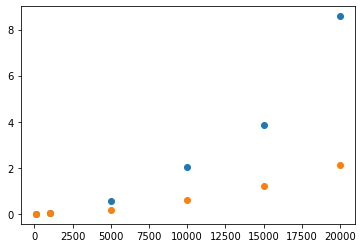

In [23]:
for i,method in enumerate(methods):
    plt.scatter(np.array(num_points),np.array(timings)[:,i],label=method)
    
plt.legend()

In [23]:
import timeit

#gen_graph_kdtree(X,batch_size=5000,r=3)
gen_graph_cuda(X,batch_size=25,r=1)

NameError: name 'gen_graph_cuda' is not defined

### Results

There are circumstanes in which KDTree can beat the GPU accelerated pairwise distance calculator. In cases where the epsilon value is small or there are a small number of features, its performances can drammatically improve. The latter is highly unlikely in the case of proteins, as euclidean embeddings often have hundreds of dimensions. The former can occur, however even then cKDTree has less flexibility in its internal distance formulation and as a result, the CUDA version was the one chosen to be implemented.

In [28]:
import time
def functionA():
   print("Function A starts the execution:")
   print("Function A completes the execution:")
def functionB():
   print("Function B starts the execution")
   print("Function B completes the execution")
start_time = timeit.default_timer()
functionA()
print(timeit.default_timer() - start_time)
start_time = timeit.default_timer()
functionB()
print(timeit.default_timer() - start_time)

Function A starts the execution:
Function A completes the execution:
0.00013821900029142853
Function B starts the execution
Function B completes the execution
9.028899967233883e-05


## Benchmarking different number of dimensions for vectors when calculating.

In [4]:
class CNN1D(nn.Module):

    def __init__(self,vocab_size=20,embedding_dim=32):
        super(CNN1D, self).__init__()
        self.embed = nn.Embedding(vocab_size,embedding_dim)
        self.linear = nn.Linear(embedding_dim,1)
        self.main = nn.Sequential(
            nn.Conv1d(embedding_dim,embedding_dim,16,dilation=1),
            nn.BatchNorm1d(embedding_dim),
            nn.ReLU(True),
            nn.Conv1d(embedding_dim,embedding_dim,8,dilation=2),
            nn.BatchNorm1d(embedding_dim),
            nn.ReLU(True),
            nn.Conv1d(embedding_dim,embedding_dim,4,dilation=4),
            nn.BatchNorm1d(embedding_dim),
            nn.ReLU(True),
            nn.Conv1d(embedding_dim,embedding_dim,2,dilation=8),
            nn.BatchNorm1d(embedding_dim),
            nn.ReLU(True)
        )
        
    def forward(self,x):
        input_ = torch.transpose(self.embed(x),1,2)
        latent = self.main(input_)
        final = torch.sum(latent,axis=2)
        return self.linear(final)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', torch.cuda.get_device_name(0))
    
model = CNN1D(embedding_dim=32)
model = model.to(device)
model.double()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01,weight_decay=1e-5)

pab1 = pg.Prograph(csv_path="data/datasets/pab1/pab1_double_mut_processed_stardropped.csv",gen_graph=True)


Using device: GeForce RTX 2080 Ti


100%|██████████| 4565/4565 [00:04<00:00, 944.02it/s]



            Protein Landscape class
            Number of Sequences : 36522
            Max Distance        : 4
            Longest Sequence    : 75
            Number of Distances : 5
            Seed Sequence       : GNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFWVVHFEEEGAAKEAIDALNGMLLNGQEIYVAP
                Modified positions are shown in green


In [9]:
X1,Y1,X2,Y2,X3,Y3 = land("sklearn",labels=["Fitness","Degree"])

In [3]:
ube4b = pg.Prograph(csv_path="data/datasets/ube4b/ube4b_clean.csv",index_col=None)

100%|██████████| 11378/11378 [00:37<00:00, 303.42it/s]



            Protein Landscape class
            Number of Sequences : 91031
            Max Distance        : 12
            Longest Sequence    : 102
            Number of Distances : 12
            Seed Sequence       : IEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTVLDRSIILRHLLYSPTDPFTRQILTESMLEPVPELKEQIQAWMREKQSSDH
                Modified positions are shown in green


In [4]:
pg.utils.save(ube4b)

Saving Graph to ube4b_clean_pgraph.csv


True

In [13]:
deg = pab1.degree()

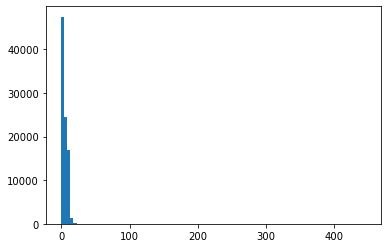

In [39]:
plt.hist(ube4b.degree(),bins=100)
plt.show()

In [15]:
gfp = pg.Prograph(csv_path="data/datasets/avGFP/avGFP_stardropped.csv",gen_graph=True)


100%|██████████| 6465/6465 [00:18<00:00, 342.39it/s]



            Protein Landscape class
            Number of Sequences : 51722
            Max Distance        : 16
            Number of Distances : 17
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green
        


In [3]:
land.fit(RandomForestRegressor, {"n_estimators" : 200})

Training model RandomForestRegressor(n_estimators=200)
Model score on training data: 0.991014233763719
Score of RandomForestRegressor(n_estimators=200) on testing data is 0.9351523780472133


(0.991014233763719, 0.9351523780472133)

In [143]:
# Python Gen1

results = {}
tokenized = tokenized[:]

for i,seq in enumerate(tqdm.tqdm(tokenized)):
    current = []
    for j,seq2 in enumerate(tokenized):
        d = np.sum(seq != seq2)
        if d == 1:
            current.append(j)
    results[i] = np.array(current)

  0%|          | 8/100000 [00:03<11:24:03,  2.44it/s]


KeyboardInterrupt: 

In [3]:
gb1 = pg.Prograph(csv_path="data/datasets/gb1/G_Protein_Clean_Sequences.csv")



        Protein Landscape class
            Number of Sequences : 535917
            Max Distance        : 4
            Number of Distances : 4
            Seed Sequence       : MAAKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE
                Modified positions are shown in green
        


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for dataset in datasets:
    dataset.fit(RandomForestRegressor, {"n_estimators" : 200})

Training model RandomForestRegressor(n_estimators=200)
Model score on training data: 0.9469347590496258
Score of RandomForestRegressor(n_estimators=200) on testing data is 0.6289505680803138
Training model RandomForestRegressor(n_estimators=200)
Model score on training data: 0.9214075738304122
Score of RandomForestRegressor(n_estimators=200) on testing data is 0.48634490352758064
Training model RandomForestRegressor(n_estimators=200)
Model score on training data: 0.9640363802066666
Score of RandomForestRegressor(n_estimators=200) on testing data is 0.7250898818331764
Training model RandomForestRegressor(n_estimators=200)
Model score on training data: 0.7756746170685175
Score of RandomForestRegressor(n_estimators=200) on testing data is -5.303638707199095
Training model RandomForestRegressor(n_estimators=200)
Model score on training data: 0.8813411507982142
Score of RandomForestRegressor(n_estimators=200) on testing data is 0.049485136342129366


In [ ]:
datasets = [
    pg.Prograph(csv_path="data/datasets/avGFP/avGFP_stardropped.csv",gen_graph=True),
    pg.Prograph(csv_path="data/datasets/blac/Blac_EC50_Cleaned.csv",gen_graph=True),
    pg.Prograph(csv_path="data/datasets/gb1/G_Protein_Clean_Sequences.csv",gen_graph=True),
    pg.Prograph(csv_path="data/datasets/pab1/pab1_double_mut_processed_stardropped.csv",gen_graph=True),
    pg.Prograph(csv_path="data/datasets/TF/TF_NEWROS_Cleaned.csv",gen_graph=True),
    pg.Prograph(csv_path="data/datasets/ube4b/ube4b_clean.csv",gen_graph=True)
]

 91%|█████████ | 5870/6465 [00:18<00:01, 330.34it/s]

In [4]:
pg.Prograph(csv_path="data/datasets/ube4b/ube4b_clean.csv",gen_graph=True)

Building Protein Graph for entire dataset


100%|██████████| 91031/91031 [01:38<00:00, 921.04it/s] 



        Protein Landscape class
            Number of Sequences : 91031
            Max Distance        : 12
            Number of Distances : 11
            Seed Sequence       : IEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTVLDRSIILRHLLYSPTDPFTRQILTESMLEPVPELKEQIQAWMREKQSSDH
                Modified positions are shown in green
        


Protein_Landscape(seed_seq='IEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTVLDRSIILRHLLYSPTDPFTRQILTESMLEPVPELKEQIQAWMREKQSSDH',
                                  gen_graph=True,
                                  csv_path='data/datasets/ube4b/ube4b_clean.csv',
                                  custom_columns={'x_data': 'Sequence', 'y_data': 'Fitness', 'index_col': None},
                                  amino_acids='ACDEFGHIKLMNPQRSTVWY')

In [27]:
pg.utils.save(datasets[4],"ube4b",directory="data/")

Saving Graph to ube4b.pkl


True

In [31]:
ube = datasets[4]
import sys

sys.getsizeof(ube.tokenized)

74281416

In [6]:
# np gen2

cutoff=1
batch_size = 500
i = 0

def get_every_n(a, n=2):
    for i in range(a.shape[0] // n):
        yield a[n*i:n*(i+1)]
        
for batch in tqdm.tqdm(list(get_every_n(tokenized,n=batch_size))):
    np.where(np.sum(tokenized != batch[:,None,:],axis=2) == 1)

  2%|▏         | 4/200 [00:05<04:22,  1.34s/it]


KeyboardInterrupt: 

In [13]:
# CUDA gen1

torch_token.cuda()

cutoff=1
batch_size = 50
i = 0

for batch in tqdm.tqdm(list(get_every_n(torch_token,n=batch_size))):
    i += 1
    batch.cuda()
    torch.where(torch.sum(torch_token != batch[:,None,:],axis=2) == 1)

 27%|██▋       | 538/2000 [00:24<01:06, 22.02it/s]


KeyboardInterrupt: 

In [32]:
# Cuda gen2
from torch.utils.data import DataLoader

torch_token = torch.as_tensor(tokenized,dtype=torch.float32)

train_dataloader = DataLoader(torch_token, batch_size=8, shuffle=False,num_workers=1,pin_memory=True)

for batch in tqdm.tqdm(train_dataloader):
    torch.where(torch.sum(torch_token != batch[:,None,:],axis=2) == 1)

 31%|███       | 3890/12500 [00:08<00:18, 465.05it/s]


KeyboardInterrupt: 

In [18]:
#gfp_token = torch.as_tensor(gfp.tokenized[:,:-1].astype(np.float16),dtype=torch.float16,device=torch.device('cuda:0'))
torch_token = torch.as_tensor(tokenized,dtype=torch.float16,device=torch.device('cuda:0'))

# Check 32 vs 16 when performing multiplications for euclidean distance.


In [20]:
# True CUDA gen 3

results = []

def get_every_n(a, n=2):
    for i in range(a.shape[0] // n):
        yield a[n*i:n*(i+1)]

batch_size=8
for batch in tqdm.tqdm(list(get_every_n(torch_token,n=batch_size))):
    results.append([x.cpu().numpy() for x in torch.where(torch.sum(torch_token != batch[:,None,:],axis=2) == 1)])

100%|██████████| 12500/12500 [00:05<00:00, 2362.02it/s]


In [23]:
torch.sum(torch_token != batch[:,None,:],axis=2)

tensor([[5, 5, 4,  ..., 1, 1, 1],
        [5, 5, 5,  ..., 1, 1, 1],
        [5, 5, 5,  ..., 1, 1, 1],
        ...,
        [5, 5, 5,  ..., 0, 1, 1],
        [5, 5, 5,  ..., 1, 0, 1],
        [5, 5, 5,  ..., 1, 1, 0]], device='cuda:0')

In [164]:
land2 = np.array([x for x in {k: v for d in final for k, v in d.items()}.values()])



In [189]:
def prod_neighbours(index,out):
    """
    Function to convert output of np.where into arrays of neighbours.
    """
    results = {}
    idxs,neighbours = out
    idxs = idxs + (index * 8)
    for idx in np.unique(idxs):
        results[idx] = neighbours[np.where(idxs == idx)]
    return results

final = []
for idx, result in enumerate(results):
    final.append(prod_neighbours(idx,result))
    
neighbour_dict = {k: v for d in final for k, v in d.items()}
completed = []
for i in range(len(gfp_token)):
    completed.append(neighbour_dict.get(i,np.array([],dtype=np.int)))
        


In [199]:
completed[3]

array([    0,     6,     9,    16,  4308,  6433,  7734,  9927, 10672,
       10715, 11012, 12028, 20409, 26937, 29560, 31914, 38725, 38776,
       38797, 39713, 48138, 49392, 49431, 49484])

In [200]:
gfp.label_iter("neighbours")[3]

array([    0,     6,     9,    16, 49484])

In [204]:
str1 = gfp[3].seq
str1

'MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRGEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [209]:
str2 = gfp[4308].seq
str2

'MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [215]:
sum(c1 != c2 for c1, c2 in zip(str1, str2))

1

In [7]:
import matplotlib.pyplot as plt 

a = np.array([1,2,3,4,5])
b = np.array([1,1.5,2,2.5,3])
c = np.array([3,3.5,4,4.5,5])
d = np.array([2,2.25,2.5,2.75,3.25])

different_datasets = [a,b,c,d]

for i,dset in enumerate(different_datasets):
    plt.scatter(np.ones((len(dset),))*i, dset)
    plt.xlim(-0.5,len(different_datasets)-0.5)
    plt.axvline(i+0.5)
    
plt.show()

<Figure size 640x480 with 1 Axes>

Error in callback <function _enable_matplotlib_integration.<locals>.configure_once at 0x7fb9c3a261f0> (for post_run_cell):


ModuleNotFoundError: No module named 'matplotlib_inline'

In [61]:
# Cuda gen3

import torch
import torch.nn as nn
import torch.nn.functional as F


class Hamming(nn.Module):

    def __init__(self,comp):
        super(Hamming, self).__init__()
        self.comp = comp.requires_grad_(False)

    def forward(self, batch):
        return torch.where(torch.sum(self.comp != batch[:,None,:],axis=2) == 1)


net = Hamming(gfp_token)

train_dataloader = DataLoader(gfp_token, batch_size=64, shuffle=False,num_workers=8,pin_memory=True)

for batch in tqdm.tqdm(train_dataloader):
    net(batch)

  0%|          | 0/809 [00:00<?, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
RuntimeError: CUDA error: initialization error


In [60]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[1,2,4],[4,5,6],[7,8,9],[10,11,12]])
comps = []
for row in a:
    comps.append((row != b))

np.vstack(comps).reshape(3,4,3)

array([[[False, False,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [False, False, False],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False],
        [ True,  True,  True]]])

In [77]:
np.sum(b != a[:,None,:],axis=2)

array([[1, 3, 3, 3],
       [3, 0, 3, 3],
       [3, 3, 0, 3]])

In [50]:
b.T.shape

(3, 4)

In [32]:
np.sum(b != a[0],axis=1)

array([1, 3, 3, 3])

In [51]:
from scipy.spatial.distance import cdist

cutoff = 1

a = np.array([0,0,0,0,0])

np.where(np.sum(a != land.tokenized[:,:-1],axis=1) == cutoff)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),)

In [5]:
land.tokenized[2]

array([0, 0, 0, 0, 2])

In [26]:
import timeit 
a = np.array([0,1,1,1,2])
timeit.timeit("a = land.tokenized[:,:-1]",number=10000)

NameError: name 'land' is not defined

AttributeError: 'Series' object has no attribute 'reshape'

In [6]:
land.indexing(positions=[1,3])

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  28,  29,  30,  31,
        32,  33,  34,  35,  36, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 325, 326, 327, 328, 329, 330, 331, 332, 333, 352, 353, 354,
       355, 356, 357, 358, 359, 360, 379, 380, 381, 382, 383, 384, 385,
       386, 387, 406, 407, 408, 409, 410, 411, 412, 413, 414, 433, 434,
       435, 436, 437, 438, 439, 440, 441, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 487, 488, 489, 490, 491, 492, 493, 494, 495, 514,
       515, 516, 517, 518, 519, 520, 521, 522])

In [8]:
land[land.indexing(positions=[1])]

{28: Protein(seq='ACAAA',fitness=0.319414775075981,tokenized=(0, 1, 0, 0, 0),neighbours=np.array([0, 29, 30, 31, 32, 33, 34, 35, 36, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 559, 595, 631, 667, 703, 739, 775, 811, 847])),
 29: Protein(seq='ADAAA',fitness=0.4860086665331925,tokenized=(0, 2, 0, 0, 0),neighbours=np.array([0, 28, 30, 31, 32, 33, 34, 35, 36, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 560, 596, 632, 668, 704, 740, 776, 812, 848])),
 30: Protein(seq='AEAAA',fitness=0.8106354468396753,tokenized=(0, 3, 0, 0, 0),neighbours=np.array([0, 28, 29, 31, 32, 33, 34, 35, 36, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 561, 597, 633, 669, 705, 741, 777, 813, 849])),
 31: Protein(seq='AFAAA',fitness=0.659774097022516

In [10]:
def degree(land):
    degrees = np.zeros((len(land),),dtype=np.int)
    for i in range(len(land)):
        degrees[i] = len(land[i].neighbours)
    return degrees

land.update_graph(degree(land),"Degree")

In [11]:
land[3]

Protein(seq='AAAAE',fitness=0.5472409708454773,tokenized=(0, 0, 0, 0, 3),neighbours=np.array([0, 1, 2, 4, 5, 6, 7, 8, 9, 48, 57, 66, 75, 84, 93, 102, 111, 120, 129, 147, 165, 183, 201, 219, 237, 255, 273, 291, 318, 345, 372, 399, 426, 453, 480, 507, 534, 570, 606, 642, 678, 714, 750, 786, 822]),Degree=45)

In [12]:
land.fit(LinearRegression,{"fit_intercept" : True})

Training model LinearRegression()
Model score on training data: 0.002244423024432729
Score of LinearRegression() on testing data is 0.0022010921277675344


(0.002244423024432729, 0.0022010921277675344)

In [59]:
df = pd.read_csv("data/datasets/avGFP/avGFP_clean.csv")
print(len(df))
df = df.drop(df.index[np.where(["*" in x for x in df["Sequence"]])[0]])
print(len(df))
df.to_csv("data/datasets/avGFP/avGFP_stardropped.csv",index=False)

54024
51722


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

land.fit(RandomForestRegressor, {"n_estimators" : 200})

In [15]:
df = pd.read_csv("data/datasets/pab1/pab1_double_mut_processed.csv")
print(len(df))
df = df.drop(df.index[np.where(["*" in x for x in df["Sequence"]])[0]])
print(len(df))
df.to_csv("data/datasets/pab1/pab1_double_mut_processed_stardropped.csv",index=False)

39608
36522


In [25]:
land.fit(RandomForestRegressor, {"n_estimators" : 200})

80000
Training model RandomForestRegressor(n_estimators=200)
Model score on training data: 0.9836298480156968
Score of RandomForestRegressor(n_estimators=200) on testing data is 0.8813144405268162


(0.9836298480156968, 0.8813144405268162)

In [8]:
gfp = Prograph(csv_path="data/datasets/avGFP/avGFP_stardropped.csv",gen_graph=True)

100%|██████████| 6465/6465 [00:19<00:00, 340.02it/s]



        Protein Landscape class
            Number of Sequences : 51722
            Max Distance        : 16
            Number of Distances : 16
            Seed Sequence       : MKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRDEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
                Modified positions are shown in green
        


In [41]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = pab1("sklearn",shuffle=False)

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
pab1.update_graph(pab1.degree(),"Degree")

In [32]:
X,Y,_,_,_,_ = pab1.sklearn_data(split=[1,0,0],shuffle=False)

In [38]:
preds = rf.predict(X_test)

In [39]:
res = (Y_test - preds) ** 2

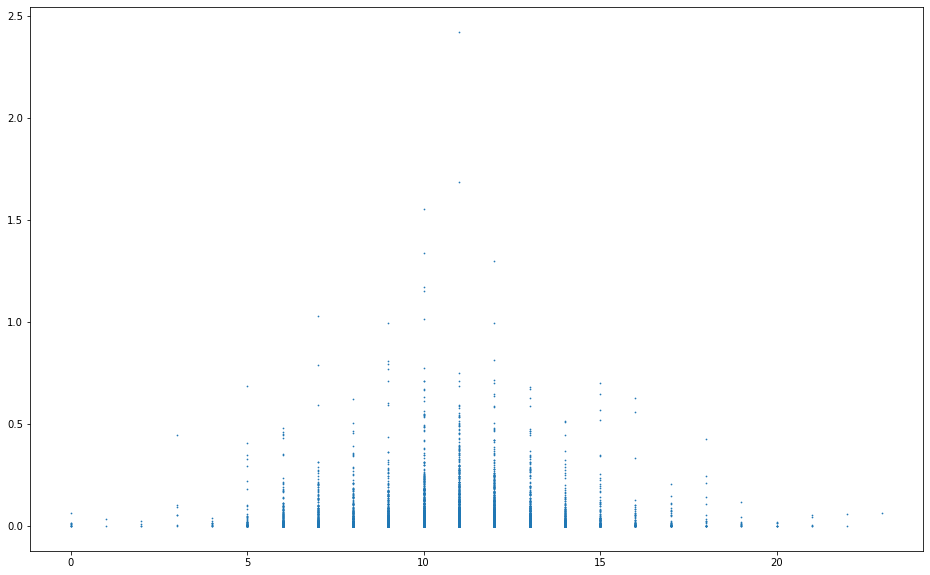

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))
plt.scatter(pab1.degree()[29217:],res,s=.5)

# Degree doesn't seem to correlate to error in prediction.

# Maybe try again with GProtein, train the model on a core, i.e the main clsuter, and then predict errors for far away positions and see if distance
# to training data does in fact correlate with error.

In [54]:
from sklearn.metrics import r2_score

r2_score(pab1.degree()[29217:],res)

-20.645570249772454

In [ ]:
df = pd.read_csv("data/datasets/ube4b/ube4b_processed.csv")
print(len(df))
df = df.drop(df.index[np.where(["*" in x for x in df["Sequence"]])[0]])
print(len(df))
df.to_csv("data/datasets/ube4b/ube4b_clean.csv",index=False)

In [66]:
df = pd.read_csv("data/datasets/ube4b/ube4b_processed.csv")
df = df.drop(df.index[np.where(["*" in x for x in df["Sequence"]])[0]])
df[["Sequence","Fitness"]].to_csv("data/datasets/ube4b/ube4b_clean.csv",index=False)

In [67]:
df= pd.read_csv("data/datasets/ube4b/ube4b_clean.csv")

In [68]:
ube = Protein_Landscape(csv_path="data/datasets/ube4b/ube4b_clean.csv",gen_graph=True)

Building Protein Graph for entire dataset


100%|██████████| 91031/91031 [01:59<00:00, 760.07it/s] 



        Protein Landscape class
            Number of Sequences : 91031
            Max Distance        : 12
            Number of Distances : 11
            Seed Sequence       : IEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTVLDRSIILRHLLYSPTDPFTRQILTESMLEPVPELKEQIQAWMREKQSSDH
                Modified positions are shown in green
        


72824
Training model RandomForestRegressor()
Model score on training data: 0.8740931418806366
Score of RandomForestRegressor() on testing data is -0.04255289032599374


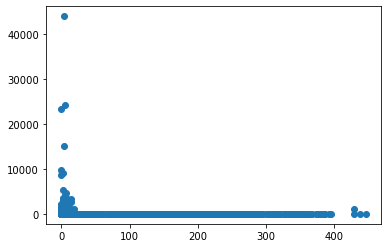

In [69]:
ube.fit(RandomForestRegressor, {"n_estimators" : 100}, save_model=True)
ube.update_graph(degree(ube),"Degree")
X,Y,_,_ = ube.sklearn_data(split=1,shuffle=False)
preds = ube.learners["RandomForestRegressor()"].predict(X)

res = (Y - preds) ** 2
plt.scatter(degree(ube),res)

In [84]:
gfp.indexing(positions=2)

KeyError: 'seq'